In [32]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import seaborn as sns
import os

train = pd.read_csv("MSBD5001/train.csv")
#train = pd.read_csv("train.csv")

pd.set_option('display.max_columns', None)


In [33]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,NaN,NaN,NaN,Fall,16.0,0.0,18.0,1.0,19.9,2.0,10.0,1.0,8.0,1.0,9.0,1.0,12.0,1.0,Fall,3.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.30138,11.58830,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,NaN,NaN,Winter,3.260,Winter,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.

In [34]:
#train.isnull().sum()[train.isnull().sum()>2000]

train.dropna(subset=['sii','PCIAT-PCIAT_Total'], inplace =True)
train.info()

numeric_data = train.select_dtypes(include=['number'])
print(numeric_data.shape[1])
categorical_data = train.select_dtypes(exclude=['number'])
print(categorical_data.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

### Feature Engineering

#### Count the number of missing number

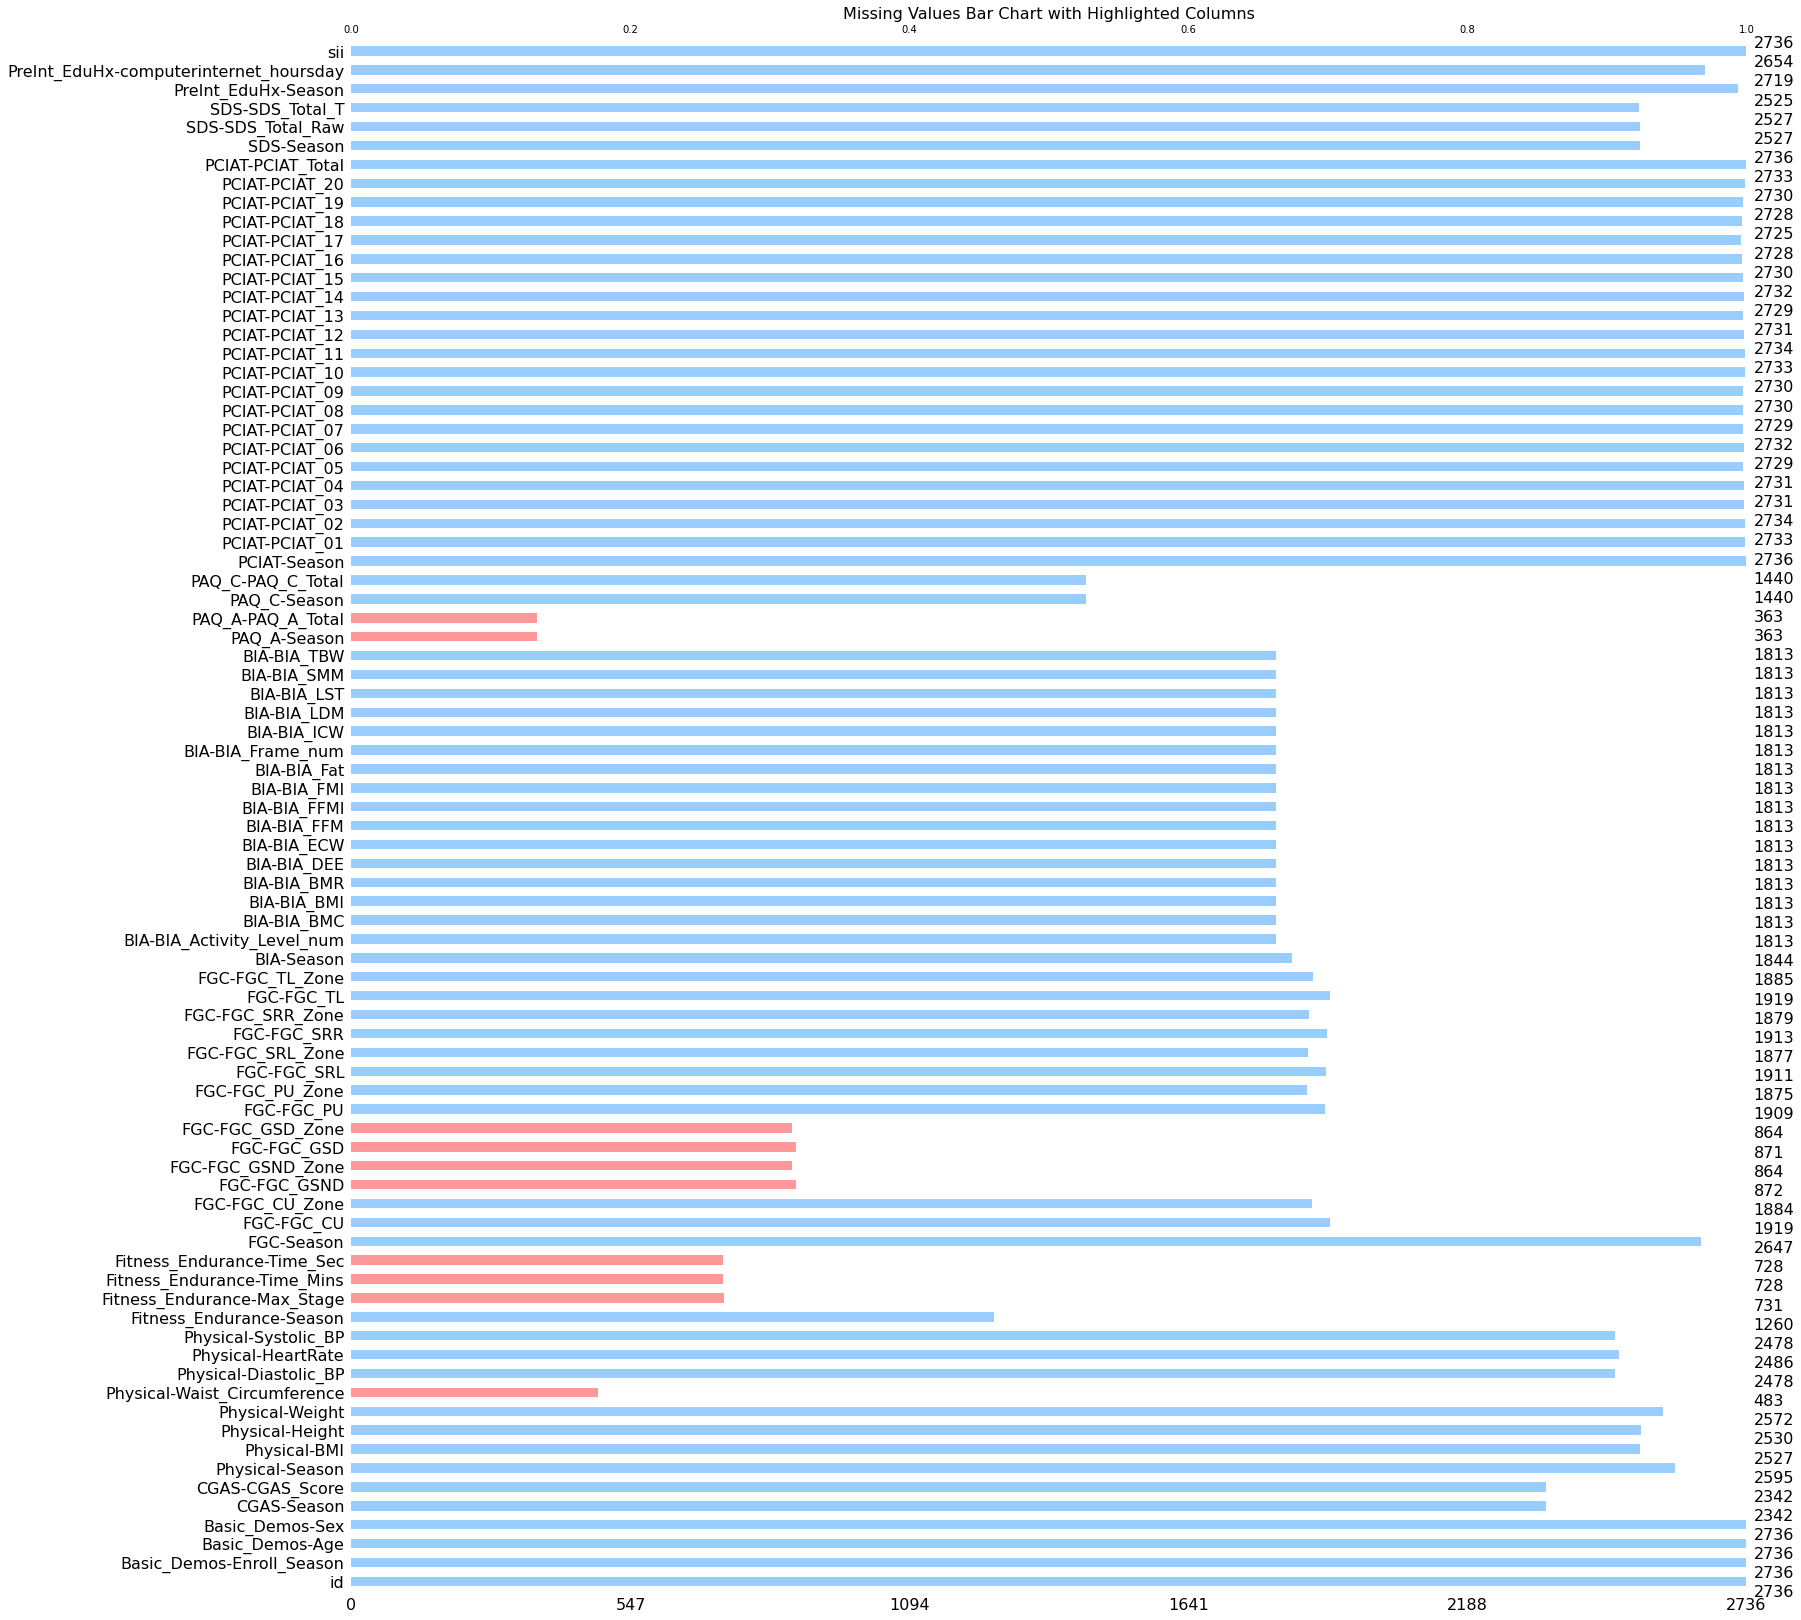

In [35]:
# pip install --user missingno
#!pip install missingno
import missingno as msno 

missing_percentages = train.isnull().mean() * 100

colors = ['#ff9999' if percent > 60 else '#99ccff' for percent in missing_percentages]

# Create the bar chart
plt.figure(figsize=(10, 6))
msno.bar(train, color=colors)
plt.title('Missing Values Bar Chart with Highlighted Columns', fontsize = 16)
plt.show()

In [36]:
# Handle the attribute PAQ_A-PAQ_A_Total, PAQ_A-Season and PAQ_C-PAQ_C_Total, PAQ_C-Season 

train['Combine_PAQ_AC'] = np.nan

train['Combine_PAQ_AC'] = train['PAQ_A-PAQ_A_Total']

train['Combine_PAQ_AC'] = train['Combine_PAQ_AC'].fillna(train['PAQ_C-PAQ_C_Total'])

view1 = train[['PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'Combine_PAQ_AC']]
print(view1.head(20))

    PAQ_A-PAQ_A_Total  PAQ_C-PAQ_C_Total  Combine_PAQ_AC
0                 NaN                NaN             NaN
1                 NaN              2.340           2.340
2                 NaN              2.170           2.170
3                 NaN              2.451           2.451
5                 NaN              4.110           4.110
6                 NaN              3.670           3.670
11                NaN              1.100           1.100
12                NaN              3.020           3.020
15                NaN                NaN             NaN
16                NaN                NaN             NaN
18                NaN                NaN             NaN
20                NaN              2.320           2.320
21              2.619                NaN           2.619
22                NaN              1.280           1.280
23                NaN              4.120           4.120
24              3.530                NaN           3.530
25                NaN          

In [37]:
train.drop(columns=['PAQ_A-Season', 'PAQ_C-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total'], inplace=True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

#### We discover that the fitness endurance time is seperated into 'Fitness_Endurance-Time_Mins' and 'Fitness_Endurance-Time_Sec' columns, to facilitate the data integrate for model training, we decided to comibe the minutes and second to obtain a complete fitness endurance time.

In [39]:
from datetime import time

# Handle Fitness_Endurance-Time_Mins and Fitness_Endurance-Time_Sec

#Fill the null value with Mean

train['Fitness_Endurance-Time_Mins'] = train['Fitness_Endurance-Time_Mins'].fillna(train['Fitness_Endurance-Time_Mins'].mean())

train['Fitness_Endurance-Time_Sec'] = train['Fitness_Endurance-Time_Sec'].fillna(train['Fitness_Endurance-Time_Sec'].mean())

def create_time_from_min_sec(row):
    return time(hour=0, minute=int(row['Fitness_Endurance-Time_Mins']), second=int(row['Fitness_Endurance-Time_Sec']))

train['Fitness_Endurance_Time'] = train.apply(create_time_from_min_sec, axis=1)

print("Updated DataFrame with Combined Fitness Endurance:")
print(train[['Fitness_Endurance_Time']])


Updated DataFrame with Combined Fitness Endurance:
     Fitness_Endurance_Time
0                  00:07:27
1                  00:07:27
2                  00:07:33
3                  00:09:37
5                  00:07:27
...                     ...
3953               00:07:27
3954               00:07:27
3955               00:07:27
3957               00:07:27
3958               00:07:27

[2736 rows x 1 columns]


In [40]:
train.drop(columns=['Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Time_Mins'], inplace=True)
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,Combine_PAQ_AC,Fitness_Endurance_Time
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.061430,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,NaN,00:07:27
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,2.340,00:07:27
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,2.170,00:07:33
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.220330,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,2.451,00:09:37
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,NaN,NaN,Summer,12.0,0.0,16.5,2.0,17.9,2.0,6.0,0.0,10.0,1.0,11.0,1.0,8.0,0.0,Summer,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.498800,67.97150,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,Summer,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0,4.110,00:07:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,8.0,1.0,10.0,1.0,12.0,1.0,Fall,3.0,3.20303,17.1417,1035.270,1759.96,11.00630,52.5331,13.4004,3.741300,14.66690,1.0,25.7118,15.81500,49.3301,20.2645,36.7181,Fall,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0,3.440,00:07:27
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.92700

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 78 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

In [42]:
# Drop column with PCIAT-PCIAT,id and Season Data
train = train.drop(columns=train.filter(regex='^PCIAT-PCIAT').columns)
train = train.drop(columns=['id'])
train = train.drop(columns=train.filter(regex='Season$').columns)

train

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,Combine_PAQ_AC,Fitness_Endurance_Time
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.061430,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN,00:07:27
1,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340,00:07:27
2,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,5.0,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170,00:07:33
3,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,6.0,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.220330,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451,00:09:37
5,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,NaN,12.0,0.0,16.5,2.0,17.9,2.0,6.0,0.0,10.0,1.0,11.0,1.0,8.0,0.0,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.498800,67.97150,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110,00:07:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,8.0,1.0,10.0,1.0,12.0,1.0,3.0,3.20303,17.1417,1035.270,1759.96,11.00630,52.5331,13.4004,3.741300,14.66690,1.0,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,0.0,3.440,00:07:27
3954,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,105.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,9.0,0.0,8.5,0.0,4.5,0.0,1.0,2.36680,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.41470,1.0,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,1.0,NaN,00:07:27
3955,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,16.0,0.0,18.0,1.0,19.9,2.0,10.0,1.0,8.0,1.0,9.0,1.0,12.0,1.0,3.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.301380,11.58830,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,1.0,3.260,00:07:27
3957,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,NaN,15.0,1.0,18.5,2.0,15.8,2.0,0.0,0.0,10.0,1.0,10.0,1.0,14.0,1.0,2.0,4.41305,21.4438,1253.740,2005.99,20.48250,75.8033,14.8043,6.639520,33.99670,2.0,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,1.0,2.729,00:07:27


In [43]:
numeric_data = train.select_dtypes(include=['number'])
print(numeric_data.shape[1])
#categorical_data = train.select_dtypes(exclude=['number'])
#print(categorical_data.shape[1])
cat_data = train.filter(regex='Zone|sii|Sex|_num')
float_data = train.select_dtypes(include=['float64'])
continnum_data = float_data.loc[:, ~float_data.columns.str.contains('PCIAT|Zone|_num')]
continnum_data = continnum_data.drop(columns=['sii'])

46


In [44]:
continnum_data

,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,Combine_PAQ_AC
0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,6.0,6.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.061430,9.21377,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,NaN
1,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,3.0,NaN,NaN,5.0,11.0,11.0,3.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.97085,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,2.340
2,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,5.0,20.0,10.2,14.7,7.0,10.0,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,2.170
3,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,6.0,18.0,NaN,NaN,5.0,7.0,7.0,7.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.220330,18.82430,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,2.451
5,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,NaN,12.0,16.5,17.9,6.0,10.0,11.0,8.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.498800,67.97150,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,NaN,0.0,NaN,NaN,0.0,8.0,10.0,12.0,3.20303,17.1417,1035.270,1759.96,11.00630,52.5331,13.4004,3.741300,14.66690,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,3.440
3954,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,105.0,NaN,0.0,NaN,NaN,0.0,9.0,8.5,4.5,2.36680,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.41470,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,NaN
3955,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,16.0,18.0,19.9,10.0,8.0,9.0,12.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.301380,11.58830,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,3.260
3957,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,NaN,15.0,18.5,15.8,0.0,10.0,10.0,14.0,4.41305,21.4438,1253.740,2005.99,20.48250,75.8033,14.8043,6.639520,33.99670,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,2.729


In [45]:
#In EDA
for col in train.columns[train.columns.str.startswith('BIA')]:
    if train[col].dtype in ['float64', 'int64']:
        Q1 = train[col].quantile(0.25)  
        Q3 = train[col].quantile(0.75) 
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mode_value = train[col].mode()[0]

        train[col] = train[col].where(
        (train[col] >= lower_bound) & (train[col] <= upper_bound),
        mode_value).where(train[col].notna(), train[col])

CGAS-CGAS_Score


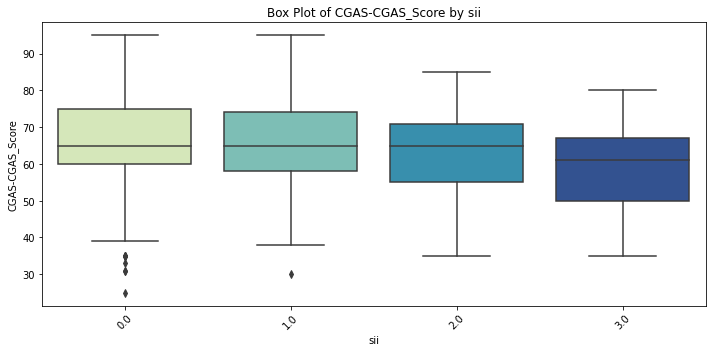

Physical-BMI


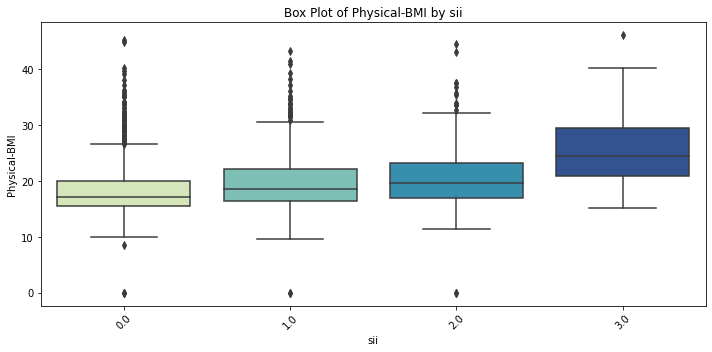

Physical-Height


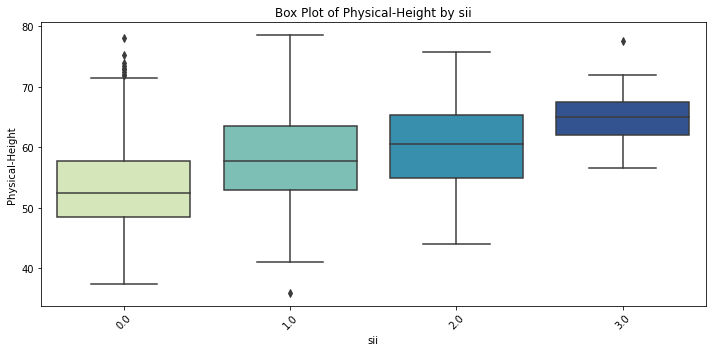

Physical-Weight


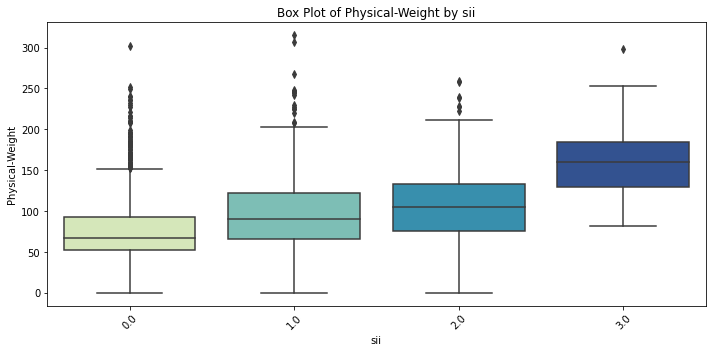

Physical-Waist_Circumference


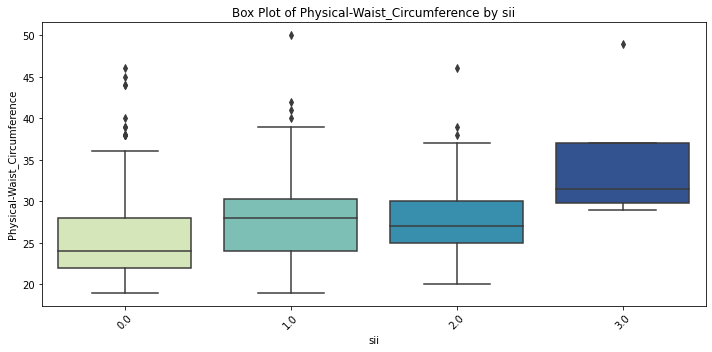

Physical-Diastolic_BP


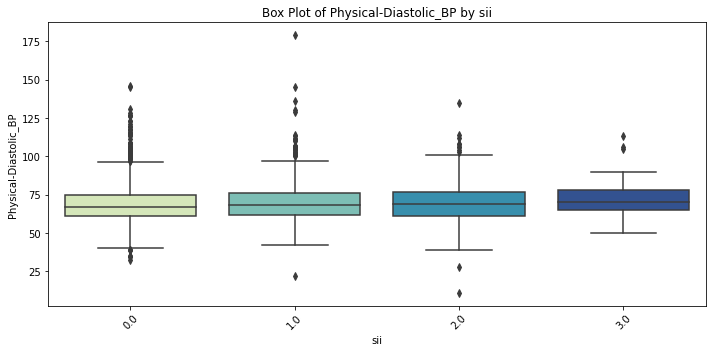

Physical-HeartRate


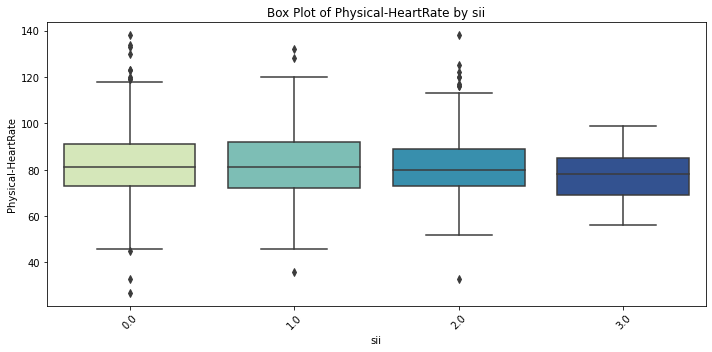

Physical-Systolic_BP


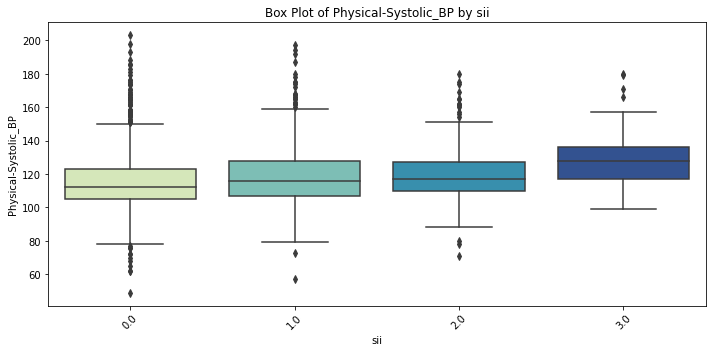

Fitness_Endurance-Max_Stage


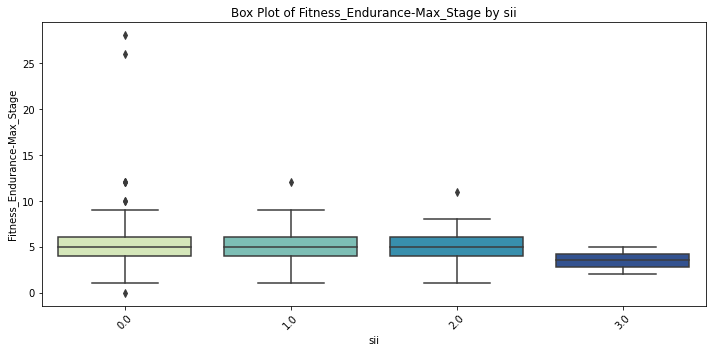

FGC-FGC_CU


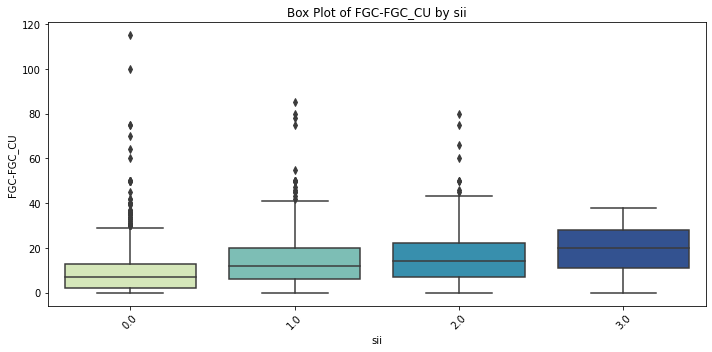

FGC-FGC_GSND


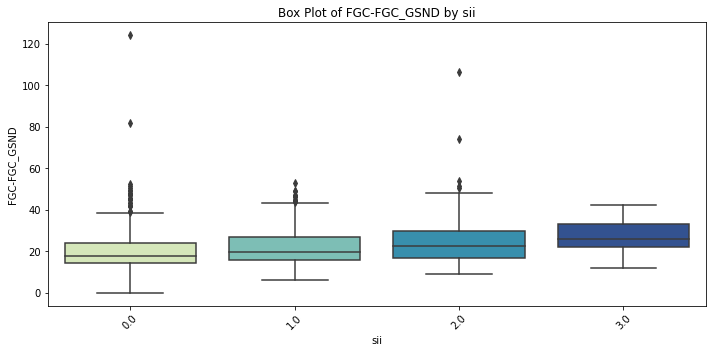

FGC-FGC_GSD


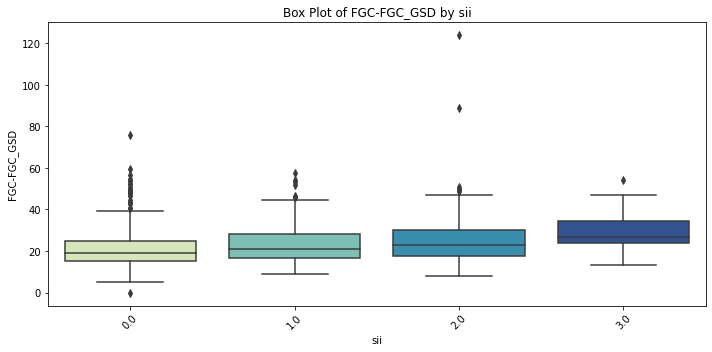

FGC-FGC_PU


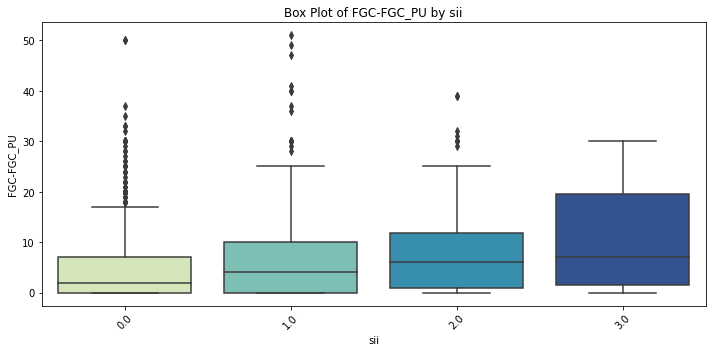

FGC-FGC_SRL


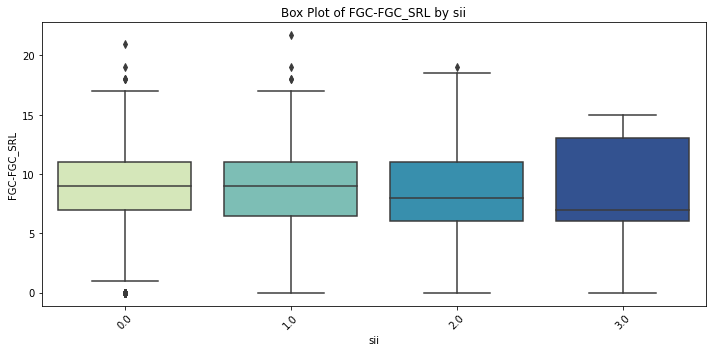

FGC-FGC_SRR


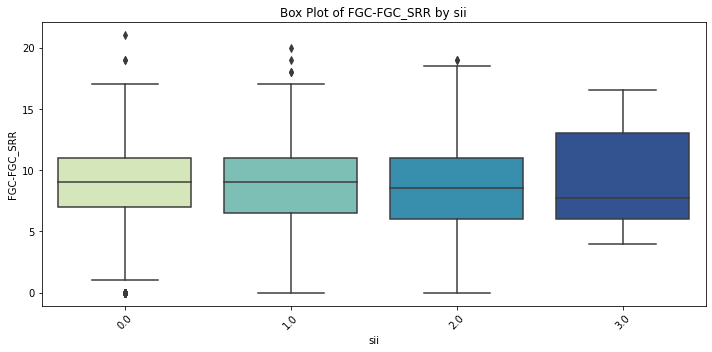

FGC-FGC_TL


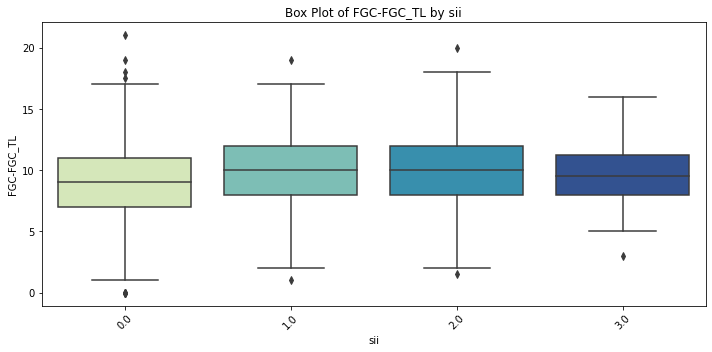

BIA-BIA_BMC


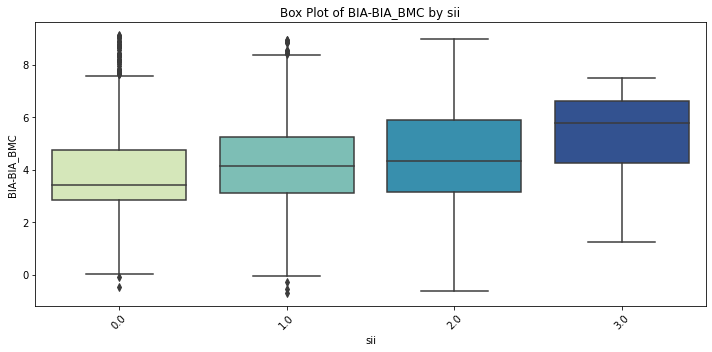

BIA-BIA_BMI


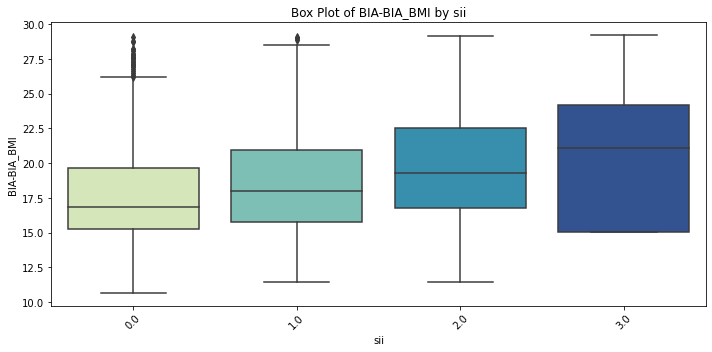

BIA-BIA_BMR


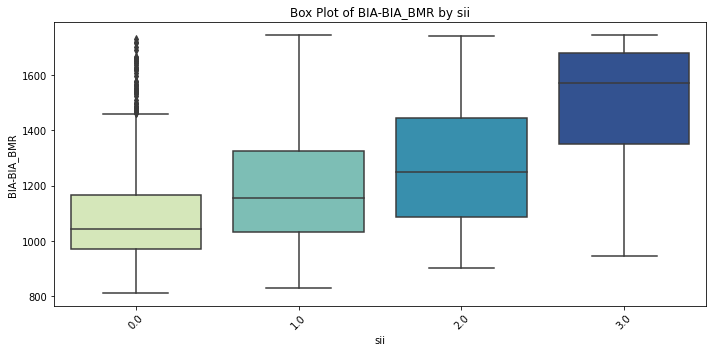

BIA-BIA_DEE


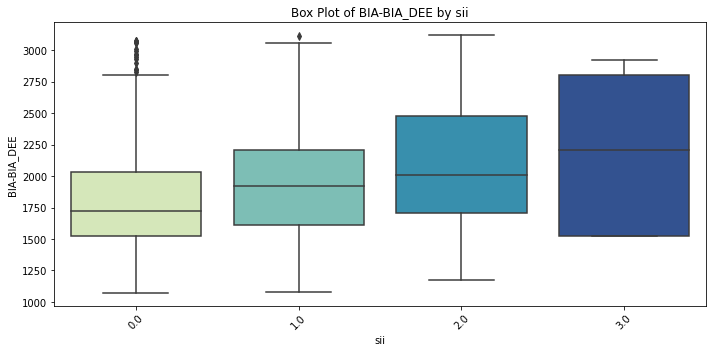

BIA-BIA_ECW


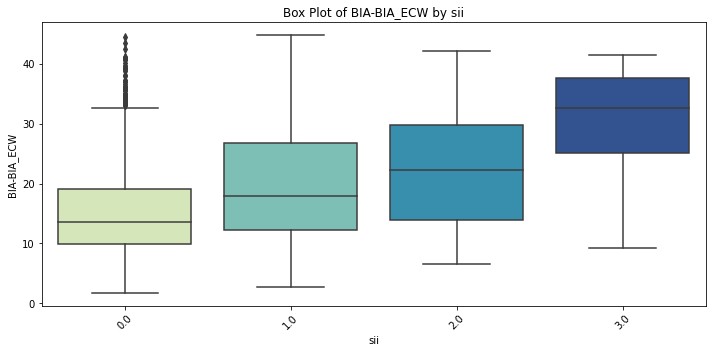

BIA-BIA_FFM


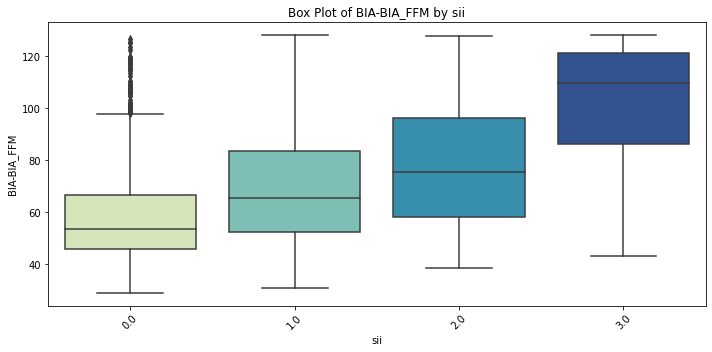

BIA-BIA_FFMI


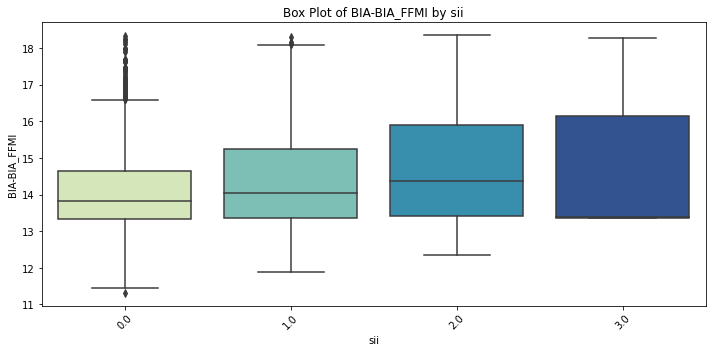

BIA-BIA_FMI


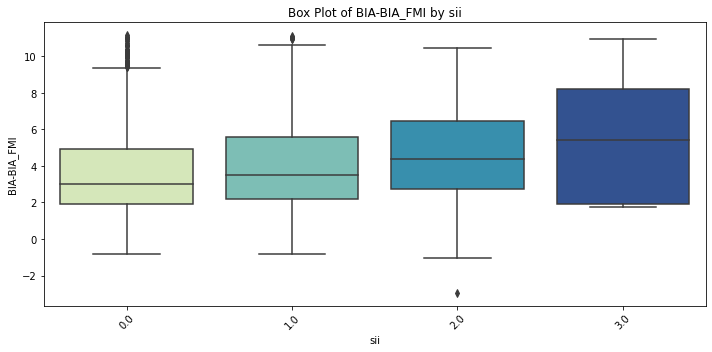

BIA-BIA_Fat


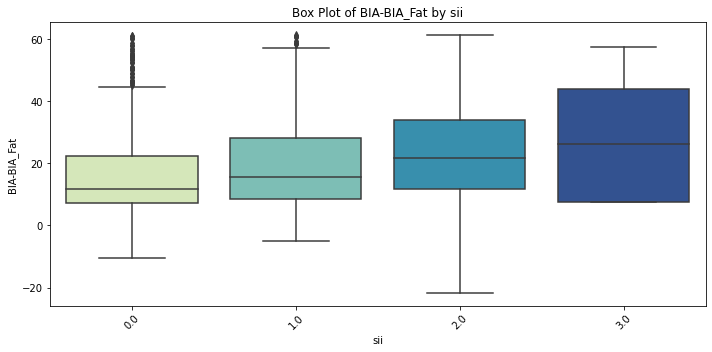

BIA-BIA_ICW


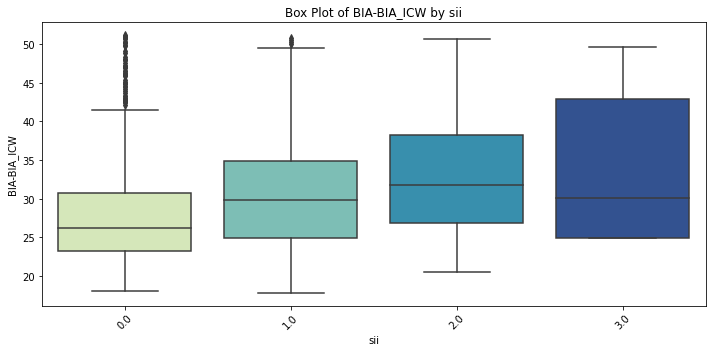

BIA-BIA_LDM


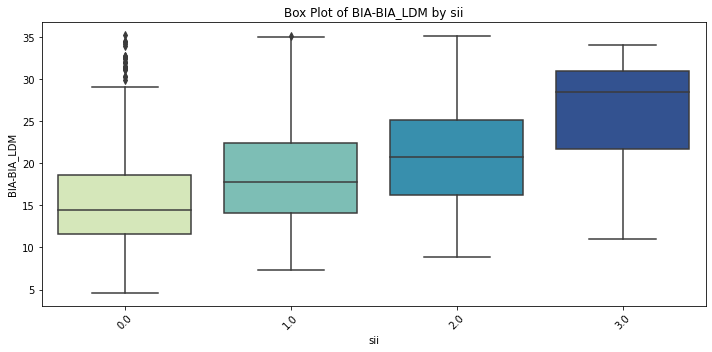

BIA-BIA_LST


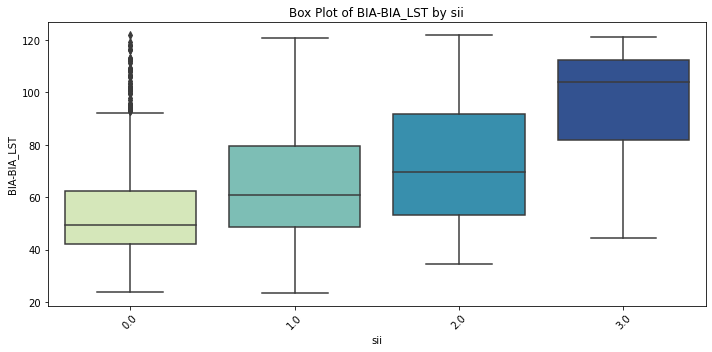

BIA-BIA_SMM


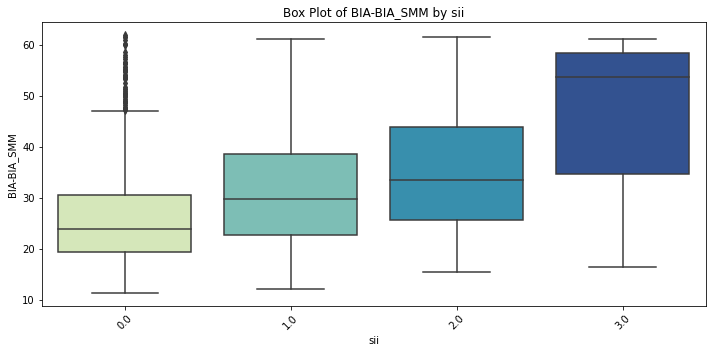

BIA-BIA_TBW


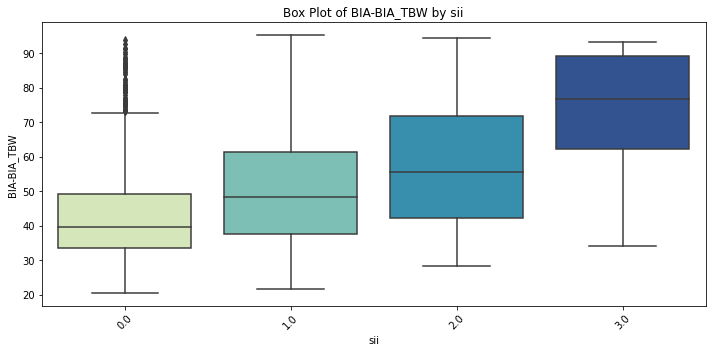

SDS-SDS_Total_Raw


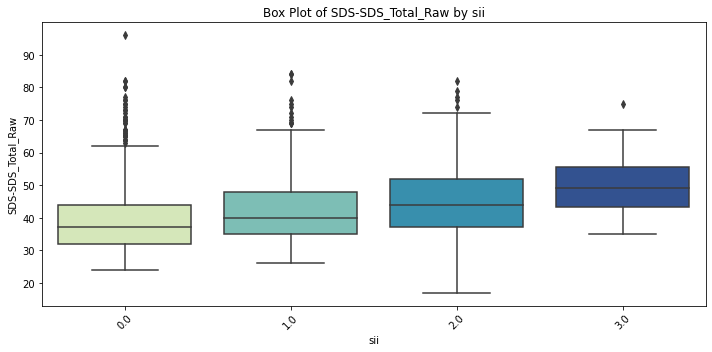

SDS-SDS_Total_T


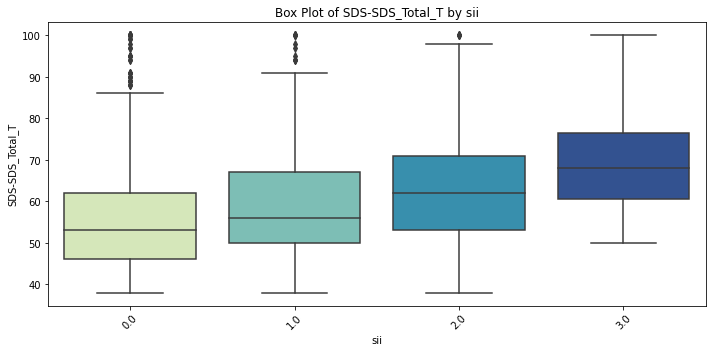

PreInt_EduHx-computerinternet_hoursday


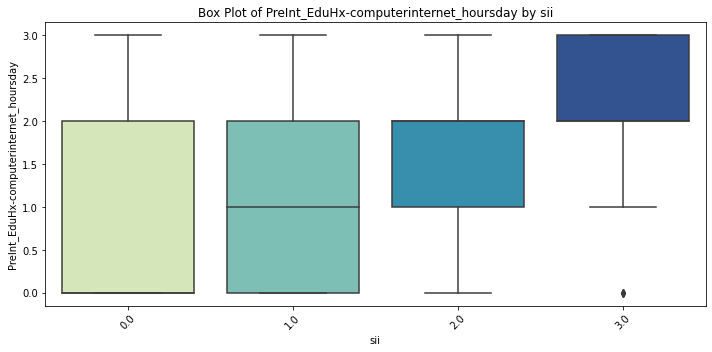

Combine_PAQ_AC


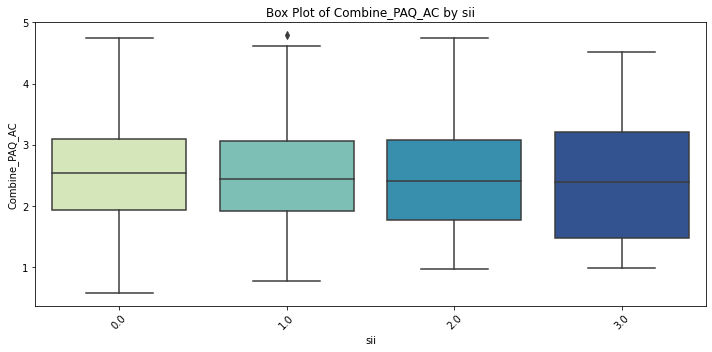

In [46]:
#In EDA
for column in continnum_data.columns:
    #if column != 'sii':
        plt.figure(figsize=(10, 5))

        # Create a box plot
        sns.boxplot(x='sii', y=column, data=train, palette='YlGnBu' )
        print(column)

        plt.title(f'Box Plot of {column} by sii')
        plt.xlabel('sii')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### Handling Outliers
#### We already remove BIA to obtain a meaningful visualisation. However, by observing the EDA results from part 1, we can still observe some outliers which affects the model training, so we decide to handle the outliers.

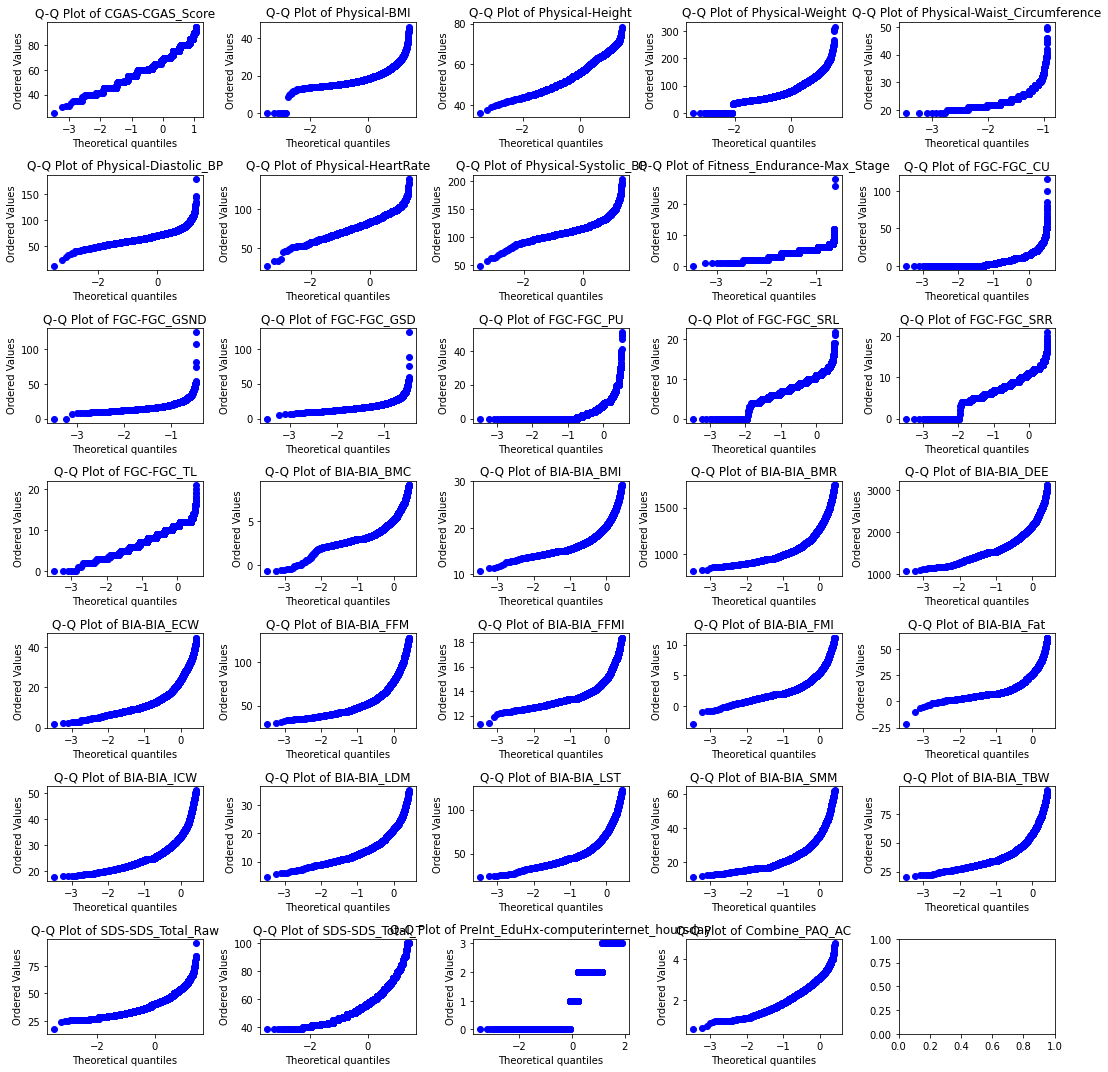

In [47]:

from scipy import stats
# Create a figure with subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(15, 15))
axes = axes.ravel()

# Loop through the columns and create Q-Q plots
for i, col in enumerate(continnum_data.columns):
        _, (__, ___, r) = stats.probplot(train[col], plot=axes[i])
        axes[i].set_title(f"Q-Q Plot of {col}")
        #print(axes[i].get_lines())

plt.tight_layout()
plt.show()

#### Test the skewness
Skewness indicates the asymmetry of the distribution of values in a dataset. We use the scipy.stats to test the skewness of the data.

In [48]:
for column in continnum_data.columns:
    skewness = stats.skew(train[column])
    #print(f'Skewness for {column}: {skewness:.4f}')
    
    # Interpret the skewness value
    if skewness < -1:
        print(f'{column} is highly negatively skewed.')
    elif skewness < -0.5:
        print(f'{column} is moderately negatively skewed.')
    elif skewness < 0.5:
        print(f'{column} is approximately symmetric.')
    elif skewness < 1:
        print(f'{column} is moderately positively skewed.')
    else:
        print(f'{column} is highly positively skewed.')

CGAS-CGAS_Score is highly positively skewed.
Physical-BMI is highly positively skewed.
Physical-Height is highly positively skewed.
Physical-Weight is highly positively skewed.
Physical-Waist_Circumference is highly positively skewed.
Physical-Diastolic_BP is highly positively skewed.
Physical-HeartRate is highly positively skewed.
Physical-Systolic_BP is highly positively skewed.
Fitness_Endurance-Max_Stage is highly positively skewed.
FGC-FGC_CU is highly positively skewed.
FGC-FGC_GSND is highly positively skewed.
FGC-FGC_GSD is highly positively skewed.
FGC-FGC_PU is highly positively skewed.
FGC-FGC_SRL is highly positively skewed.
FGC-FGC_SRR is highly positively skewed.
FGC-FGC_TL is highly positively skewed.
BIA-BIA_BMC is highly positively skewed.
BIA-BIA_BMI is highly positively skewed.
BIA-BIA_BMR is highly positively skewed.
BIA-BIA_DEE is highly positively skewed.
BIA-BIA_ECW is highly positively skewed.
BIA-BIA_FFM is highly positively skewed.
BIA-BIA_FFMI is highly posit

### IQR Based Filtering
#### 
Since we can see most of the distribution of the columns are skewed, so it is suggested to use IQR Based Filtering to handle the outliers with those columns that are skewed Since we do not want to lose so many feature for model training , we decide to use capping to fill in the outliers with IQR.

In [49]:
#train_cap = train.copy()
for column in continnum_data.columns:
    percentile25 = train[column].quantile(0.25)
    percentile75 = train[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    #print("Upper limit",upper_limit)
    #print("Lower limit",lower_limit)

    print(train[train[column] > upper_limit].count()[0])

    train[column] = np.where(train[column] > upper_limit,
    upper_limit, np.where(train[column] < lower_limit,lower_limit,
        train[column] ))



0
116
0
64
17
103
18
100
9
102
39
34
71
13
11
2
45
42
23
12
6
23
63
29
47
62
7
23
38
28
68
68
0
0


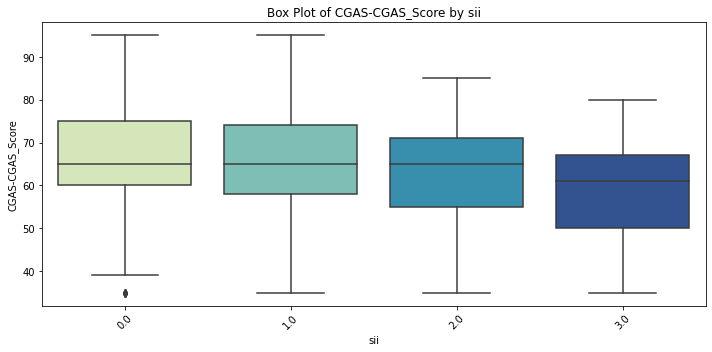

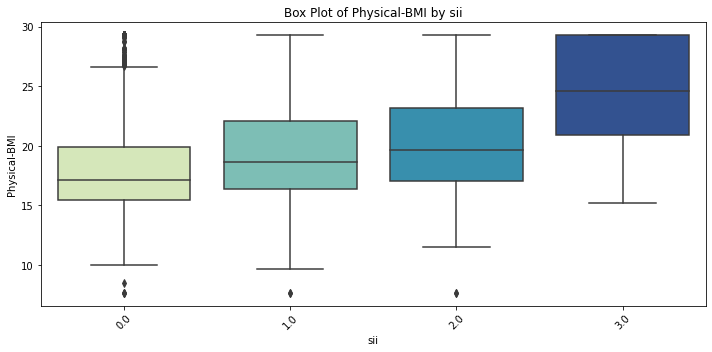

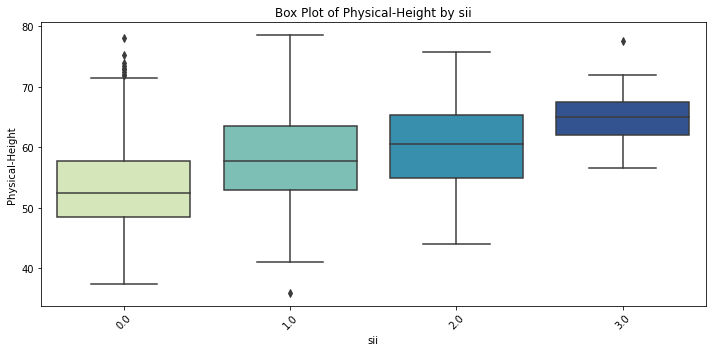

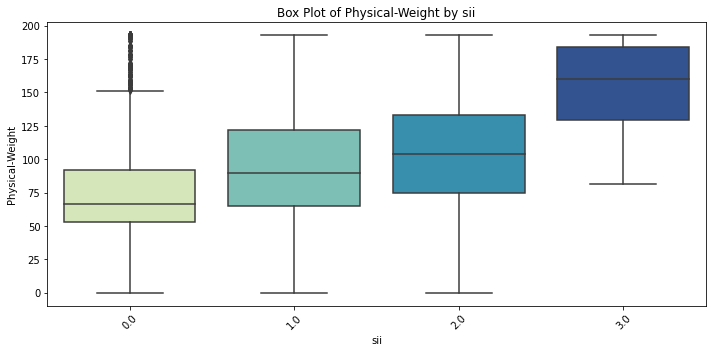

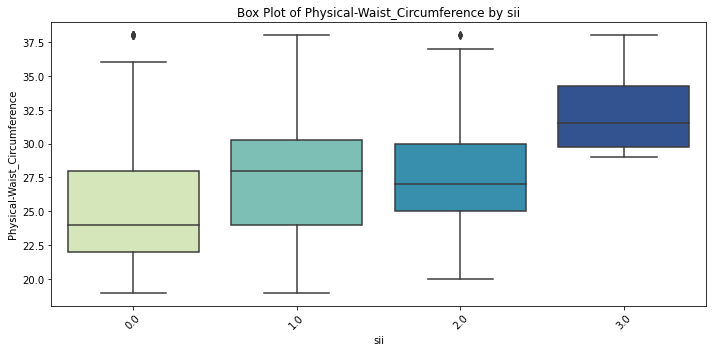

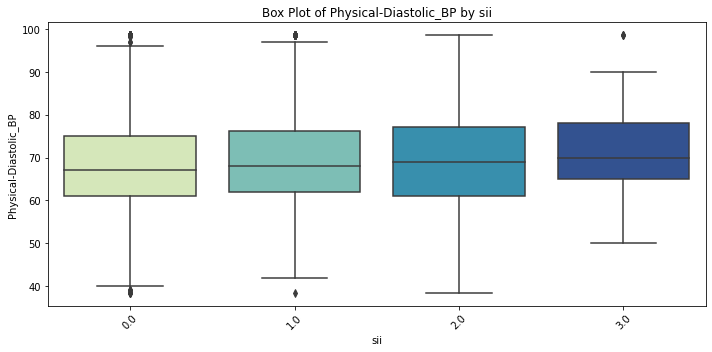

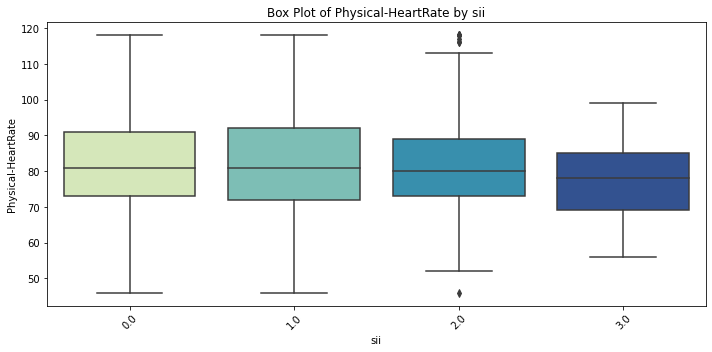

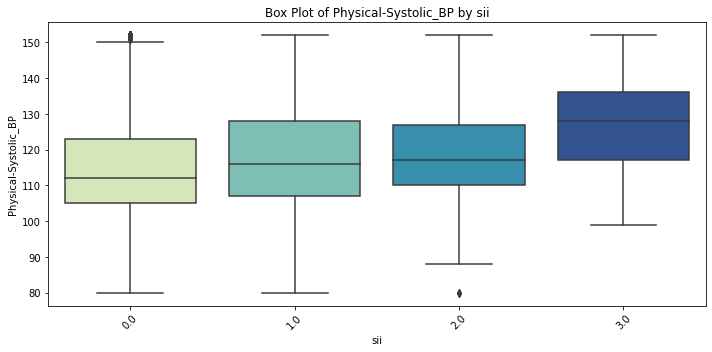

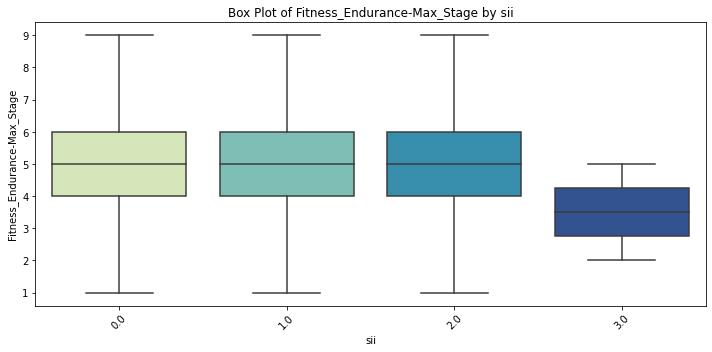

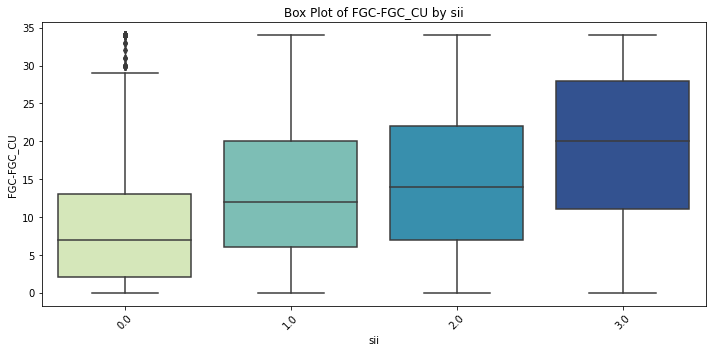

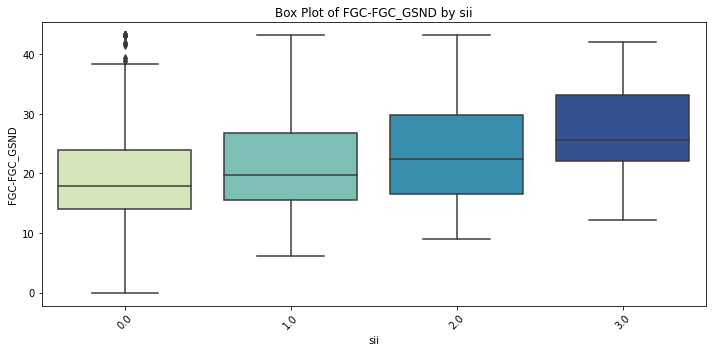

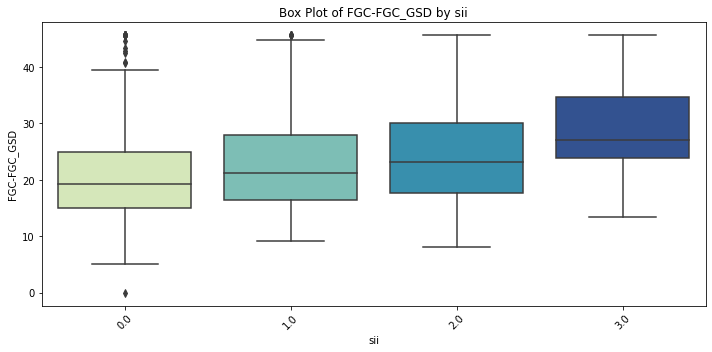

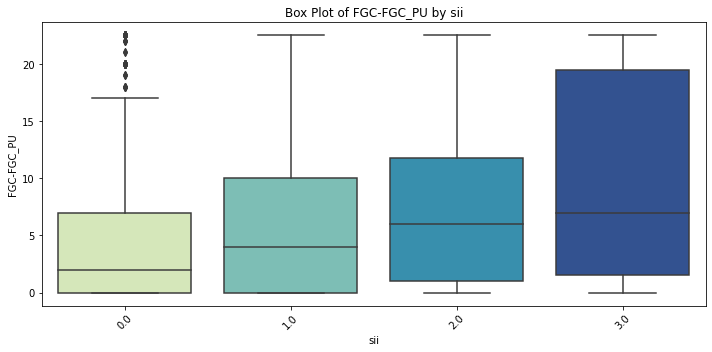

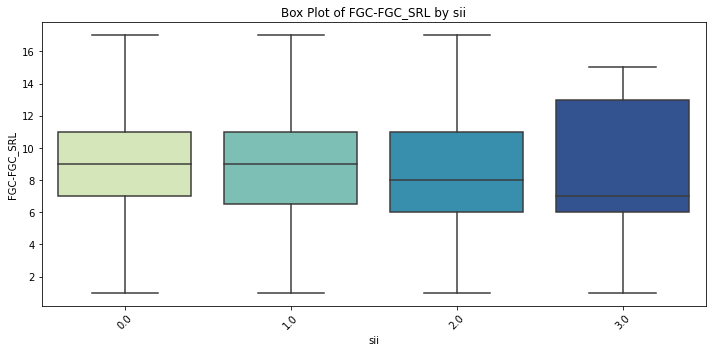

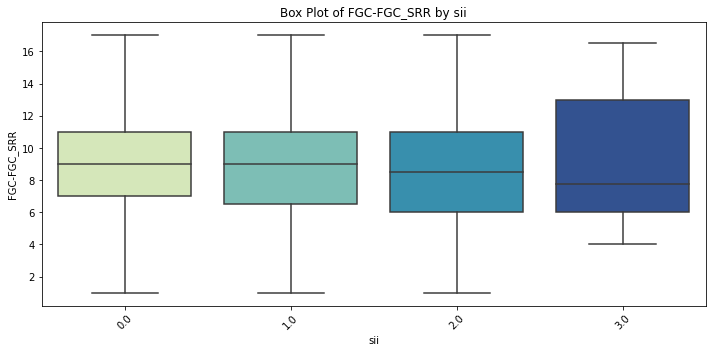

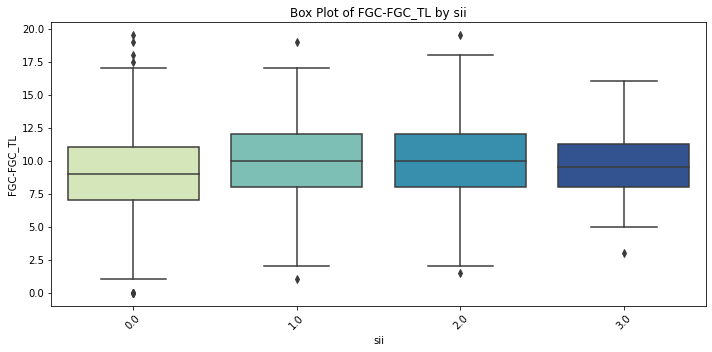

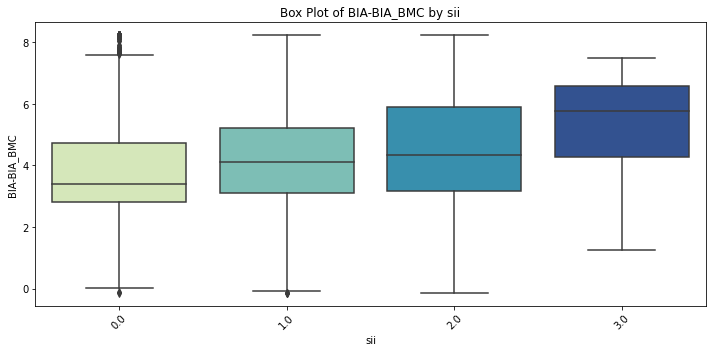

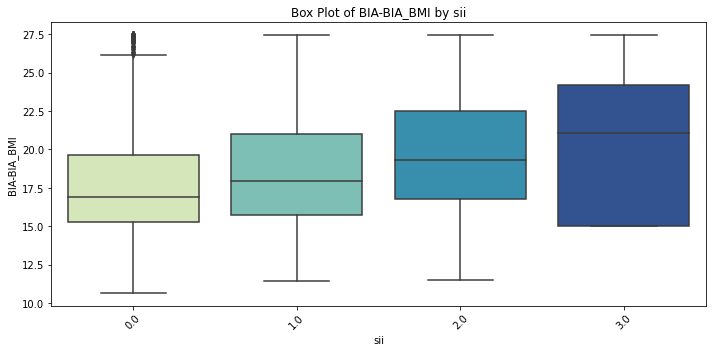

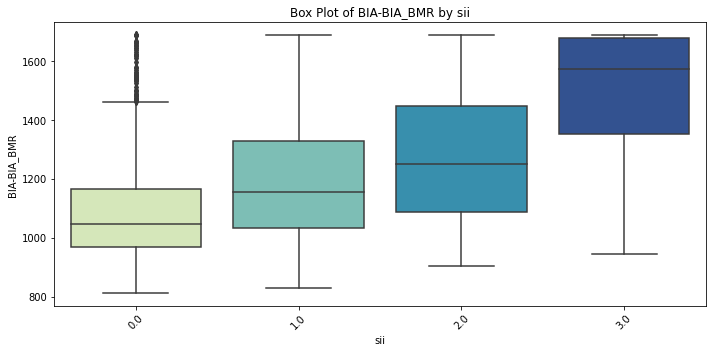

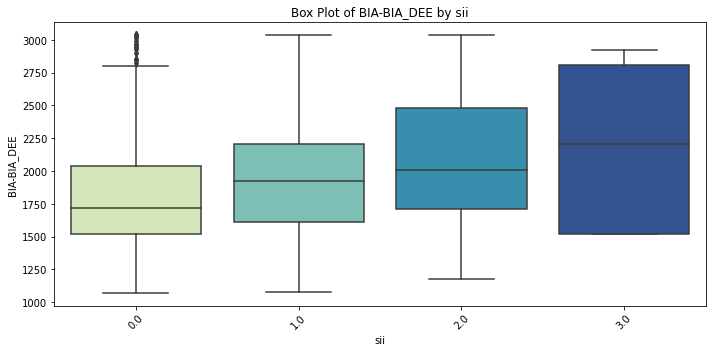

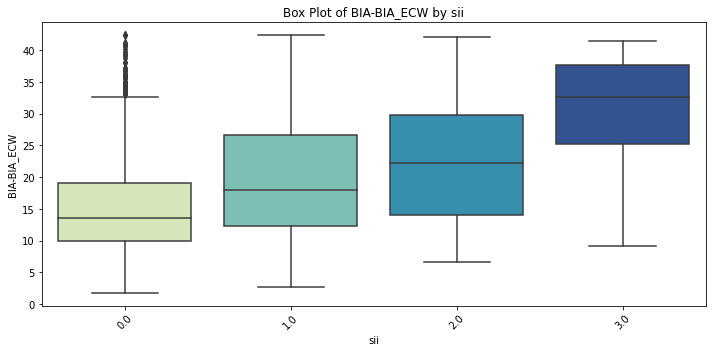

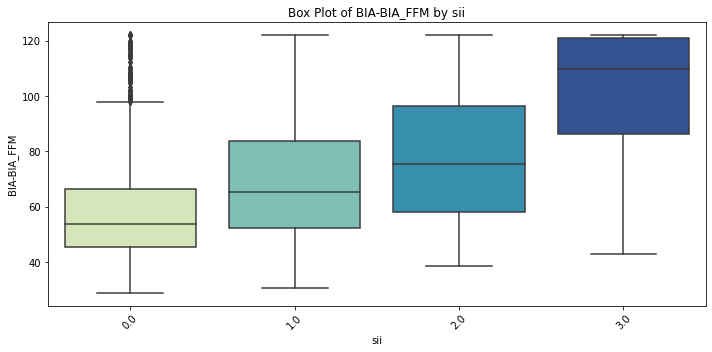

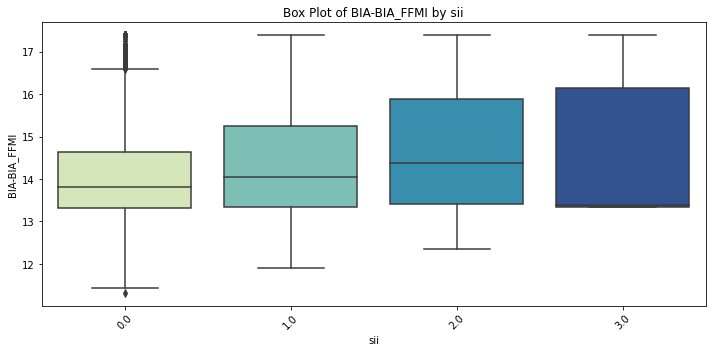

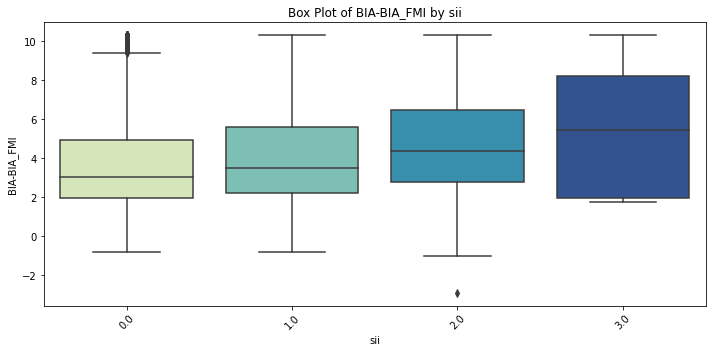

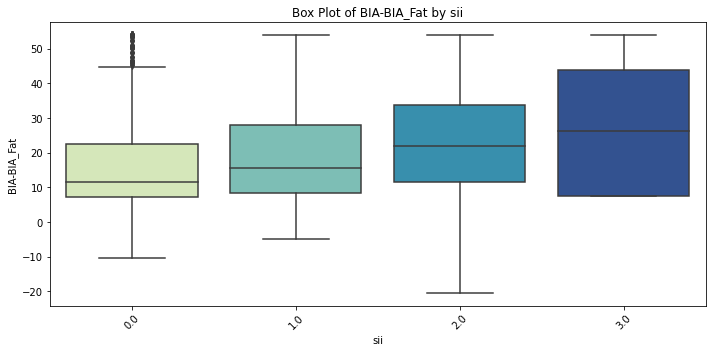

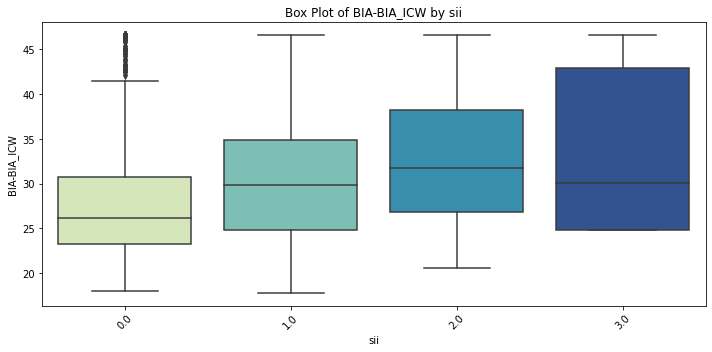

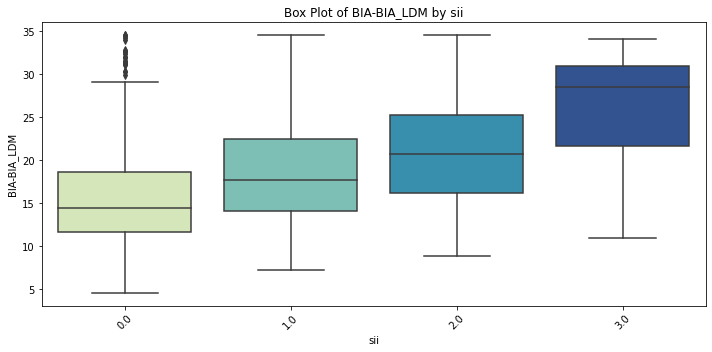

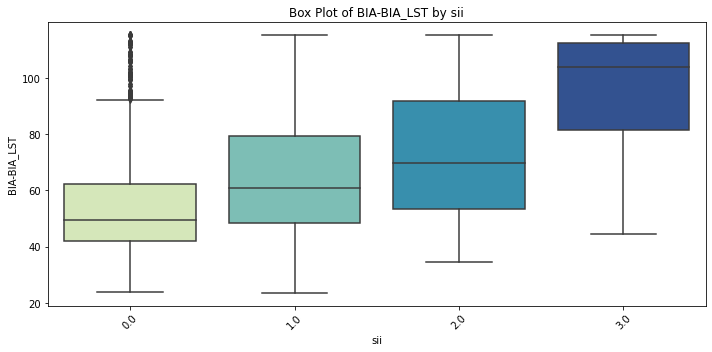

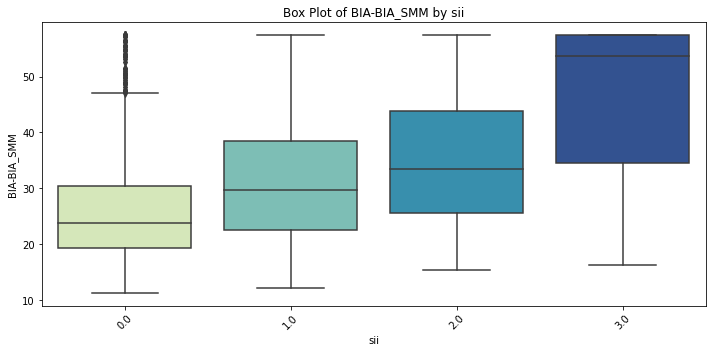

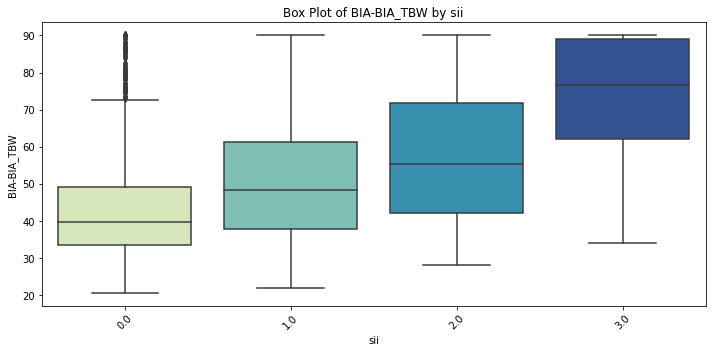

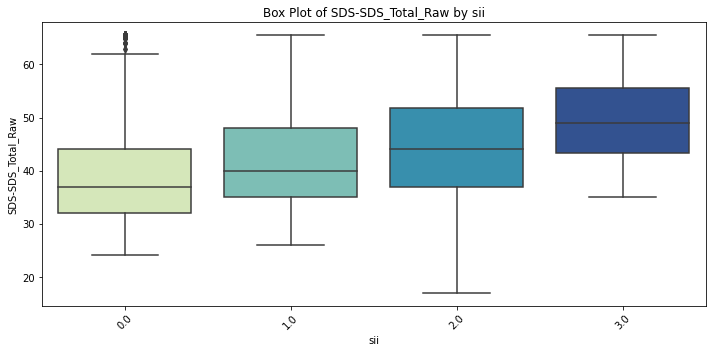

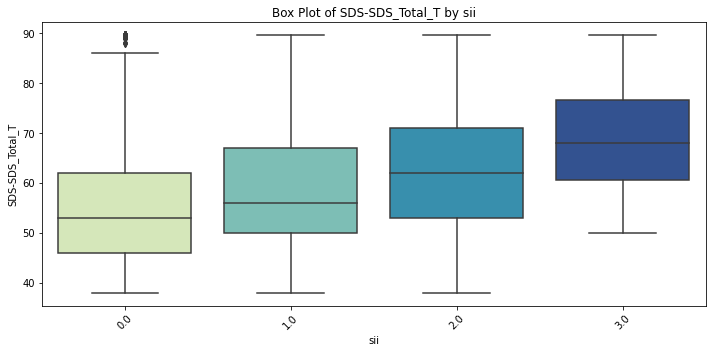

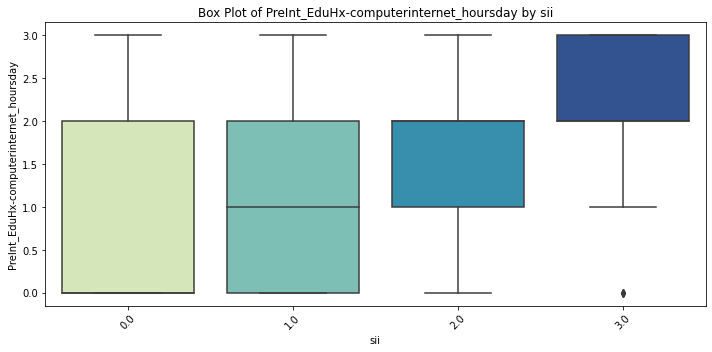

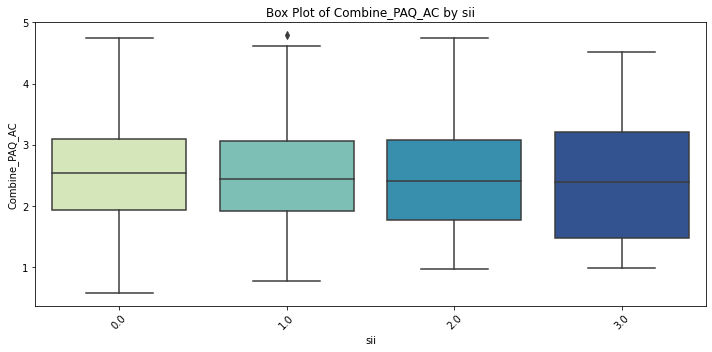

In [50]:
#For reference
for column in continnum_data.columns:
    if column != 'sii':

        plt.figure(figsize=(10, 5))

    # Create a box plot
        sns.boxplot(x='sii', y=column, data=train, palette='YlGnBu' )
        plt.title(f'Box Plot of {column} by sii')
        plt.xlabel('sii')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

We can see most of the outliers have been removed among the continous variable

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2736 non-null   int64  
 1   Basic_Demos-Sex                         2736 non-null   int64  
 2   CGAS-CGAS_Score                         2342 non-null   float64
 3   Physical-BMI                            2527 non-null   float64
 4   Physical-Height                         2530 non-null   float64
 5   Physical-Weight                         2572 non-null   float64
 6   Physical-Waist_Circumference            483 non-null    float64
 7   Physical-Diastolic_BP                   2478 non-null   float64
 8   Physical-HeartRate                      2486 non-null   float64
 9   Physical-Systolic_BP                    2478 non-null   float64
 10  Fitness_Endurance-Max_Stage             731 non-null    float64
 

### Filling the missing value

In [52]:
#Missing Date Count

#pd.options.display.max_columns = 83
pd.options.display.max_rows = 83
null_list = pd.isna(train).sum()
null_list = null_list[null_list > 0].sort_values(ascending=False) 
print(null_list)

Physical-Waist_Circumference              2253
Fitness_Endurance-Max_Stage               2005
FGC-FGC_GSND_Zone                         1872
FGC-FGC_GSD_Zone                          1872
FGC-FGC_GSD                               1865
FGC-FGC_GSND                              1864
Combine_PAQ_AC                             934
BIA-BIA_Fat                                923
BIA-BIA_FFM                                923
BIA-BIA_ECW                                923
BIA-BIA_DEE                                923
BIA-BIA_BMR                                923
BIA-BIA_BMI                                923
BIA-BIA_BMC                                923
BIA-BIA_Activity_Level_num                 923
BIA-BIA_FFMI                               923
BIA-BIA_FMI                                923
BIA-BIA_Frame_num                          923
BIA-BIA_ICW                                923
BIA-BIA_LDM                                923
BIA-BIA_LST                                923
BIA-BIA_SMM  

In [53]:
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:  # Numeric columns
        # Fill NaN with the mean for numeric columns
        train[column].fillna(train[column].mean(), inplace=True)
    elif train[column].dtype in ['object', 'category']:  # Categorical columns
        # Fill NaN with the mode for categorical columns
        train[column].fillna(train[column].mode()[0], inplace=True)

In [54]:
#Missing Date Count

#pd.options.display.max_columns = 83
pd.options.display.max_rows = 83
null_list = pd.isna(train).sum()
null_list = null_list[null_list > 0].sort_values(ascending=False) 
print(null_list)

Series([], dtype: int64)


In [55]:
for column in continnum_data.columns:
    skewness = stats.skew(train[column])
    #print(f'Skewness for {column}: {skewness:.4f}')
    
    # Interpret the skewness value
    if skewness < -1:
        print(f'{column} is highly negatively skewed.')
    elif skewness < -0.5:
        print(f'{column} is moderately negatively skewed.')
    elif skewness < 0.5:
        print(f'{column} is approximately symmetric.')
    elif skewness < 1:
        print(f'{column} is moderately positively skewed.')
    else:
        print(f'{column} is highly positively skewed.')

CGAS-CGAS_Score is approximately symmetric.
Physical-BMI is moderately positively skewed.
Physical-Height is approximately symmetric.
Physical-Weight is moderately positively skewed.
Physical-Waist_Circumference is highly positively skewed.
Physical-Diastolic_BP is moderately positively skewed.
Physical-HeartRate is approximately symmetric.
Physical-Systolic_BP is moderately positively skewed.
Fitness_Endurance-Max_Stage is moderately negatively skewed.
FGC-FGC_CU is highly positively skewed.
FGC-FGC_GSND is highly positively skewed.
FGC-FGC_GSD is highly positively skewed.
FGC-FGC_PU is highly positively skewed.
FGC-FGC_SRL is approximately symmetric.
FGC-FGC_SRR is approximately symmetric.
FGC-FGC_TL is approximately symmetric.
BIA-BIA_BMC is moderately positively skewed.
BIA-BIA_BMI is highly positively skewed.
BIA-BIA_BMR is highly positively skewed.
BIA-BIA_DEE is moderately positively skewed.
BIA-BIA_ECW is moderately positively skewed.
BIA-BIA_FFM is highly positively skewed.
BI

### Handling the Categorical Variable


In [56]:
order_dict = {
    'Basic_Demos-Sex': [0, 1],  
    'FGC-FGC_CU_Zone': [0, 1], 
    'FGC-FGC_GSND_Zone': [1, 2, 3],
    'FGC-FGC_GSD_Zone': [1, 2, 3], 
    'FGC-FGC_PU_Zone': [0, 1],  
    'FGC-FGC_SRL_Zone': [0, 1], 
    'FGC-FGC_SRR_Zone': [0, 1], 
    'FGC-FGC_TL_Zone': [0, 1], 
    'BIA-BIA_Activity_Level_num': [1, 2 ,3 ,4 ,5], 
    'BIA-BIA_Frame_num': [1, 2, 3],     
    'sii': [0, 1, 2, 3]  
}

for col, order in order_dict.items():
    train[col] = pd.Categorical(train[col], categories=order, ordered=True)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Basic_Demos-Age                         2736 non-null   int64   
 1   Basic_Demos-Sex                         2736 non-null   category
 2   CGAS-CGAS_Score                         2736 non-null   float64 
 3   Physical-BMI                            2736 non-null   float64 
 4   Physical-Height                         2736 non-null   float64 
 5   Physical-Weight                         2736 non-null   float64 
 6   Physical-Waist_Circumference            2736 non-null   float64 
 7   Physical-Diastolic_BP                   2736 non-null   float64 
 8   Physical-HeartRate                      2736 non-null   float64 
 9   Physical-Systolic_BP                    2736 non-null   float64 
 10  Fitness_Endurance-Max_Stage             2736 non-null

In [58]:
#cat_data = train.filter(regex='Zone|sii|Sex|_num')

In [59]:
train['FGC-FGC_GSND_Zone'] 

0       NaN
1       NaN
2         1
3       NaN
5         2
       ... 
3953    NaN
3954    NaN
3955      1
3957      2
3958    NaN
Name: FGC-FGC_GSND_Zone, Length: 2736, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [60]:
categorical_data = train.select_dtypes(exclude=['number'])
#categorical_data = categorical_data.drop(columns=['id'])
categorical_data

,Basic_Demos-Sex,FGC-FGC_CU_Zone,FGC-FGC_GSND_Zone,FGC-FGC_GSD_Zone,FGC-FGC_PU_Zone,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_Frame_num,sii,Fitness_Endurance_Time
0,0,0,NaN,NaN,0,0,0,1,2,1,2,00:07:27
1,0,0,NaN,NaN,0,1,1,0,2,1,0,00:07:27
2,1,1,1,2,1,1,1,0,NaN,NaN,0,00:07:33
3,0,1,NaN,NaN,0,0,0,1,3,2,1,00:09:37
5,1,0,2,2,0,1,1,0,2,2,1,00:07:27
...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0,0,NaN,NaN,0,1,1,1,3,1,0,00:07:27
3954,1,0,NaN,NaN,0,0,0,0,1,1,1,00:07:27
3955,0,0,1,2,1,1,1,1,3,1,1,00:07:27
3957,0,1,2,2,0,1,1,1,2,2,1,00:07:27


In [61]:
# Function to convert time to seconds
def time_to_seconds(time_str):
    m = time_str.minute
    s = time_str.second
    return m * 60 + s

# Convert to Numeric
train['Fitness_Endurance_Time'] = train['Fitness_Endurance_Time'].apply(time_to_seconds)

In [62]:
train['Fitness_Endurance_Time'] = train['Fitness_Endurance_Time'].astype(int)
train['Fitness_Endurance_Time'] 

0       447
1       447
2       453
3       577
5       447
       ... 
3953    447
3954    447
3955    447
3957    447
3958    447
Name: Fitness_Endurance_Time, Length: 2736, dtype: int32

In [63]:
for column in categorical_data.columns:
    train[column] = train[column].astype('category').cat.codes


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2736 non-null   int64  
 1   Basic_Demos-Sex                         2736 non-null   int8   
 2   CGAS-CGAS_Score                         2736 non-null   float64
 3   Physical-BMI                            2736 non-null   float64
 4   Physical-Height                         2736 non-null   float64
 5   Physical-Weight                         2736 non-null   float64
 6   Physical-Waist_Circumference            2736 non-null   float64
 7   Physical-Diastolic_BP                   2736 non-null   float64
 8   Physical-HeartRate                      2736 non-null   float64
 9   Physical-Systolic_BP                    2736 non-null   float64
 10  Fitness_Endurance-Max_Stage             2736 non-null   float64
 

#### Model Training

In [65]:
Trial1lst = ["Physical-BMI", "Physical-Height", "Physical-Weight", "Physical-Waist_Circumference",
            "Basic_Demos-Age", "BIA-BIA_Activity_Level_num", "BIA-BIA_Frame_num", 
             "PreInt_EduHx-computerinternet_hoursday" , "sii"]

Trial1lst = Trial1lst + train.loc[:, 'BIA-BIA_Activity_Level_num':'SDS-SDS_Total_T'].columns.tolist()
Trial1lst

Trial1 = train[Trial1lst]

In [66]:
Trial2lst = ["Physical-BMI", "Physical-Height", "Physical-Weight", "Physical-Waist_Circumference",
            "Basic_Demos-Age", "PreInt_EduHx-computerinternet_hoursday" ,"FGC-FGC_CU",  "FGC-FGC_GSND", "FGC-FGC_GSD", 
             "FGC-FGC_PU", "FGC-FGC_SRL","FGC-FGC_SRR", "FGC-FGC_TL" , "sii"]

In [67]:
Trial2lst = Trial2lst + train.loc[:, 'BIA-BIA_Activity_Level_num':'SDS-SDS_Total_T'].columns.tolist()
Trial2 = train[Trial2lst]

In [68]:
Trial3lst = ["Physical-BMI", "Physical-Height", "Physical-Weight", "Physical-Waist_Circumference",
            "Basic_Demos-Age", "PreInt_EduHx-computerinternet_hoursday" ,"FGC-FGC_CU_Zone",  "FGC-FGC_GSND_Zone", "FGC-FGC_GSD_Zone", 
             "FGC-FGC_PU_Zone", "FGC-FGC_SRL_Zone","FGC-FGC_SRR_Zone", "FGC-FGC_TL_Zone" ,"Physical-Diastolic_BP", 
             "Physical-HeartRate", "Physical-Systolic_BP","BIA-BIA_Activity_Level_num", "BIA-BIA_Frame_num", "sii"]

Trial3lst = Trial3lst + train.loc[:, 'BIA-BIA_Activity_Level_num':'SDS-SDS_Total_T'].columns.tolist()
Trial3lst

Trial3 = train[Trial3lst]


In [69]:
 Trial3 = train[Trial3lst]

Performing PCA

In [70]:
features_for_pca = train.loc[:, 'FGC-FGC_CU':'FGC-FGC_TL_Zone']
features_for_pca

,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone
0,0.000000,0,21.676293,-1,22.730941,-1,0.000000,0,7.000000,0,6.000000,0,6.000000,1
1,3.000000,0,21.676293,-1,22.730941,-1,5.000000,0,11.000000,1,11.000000,1,3.000000,0
2,20.000000,1,10.200000,0,14.700000,1,7.000000,1,10.000000,1,10.000000,1,5.000000,0
3,18.000000,1,21.676293,-1,22.730941,-1,5.000000,0,7.000000,0,7.000000,0,7.000000,1
5,12.000000,0,16.500000,1,17.900000,1,6.000000,0,10.000000,1,11.000000,1,8.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0.000000,0,21.676293,-1,22.730941,-1,0.000000,0,8.000000,1,10.000000,1,12.000000,1
3954,0.000000,0,21.676293,-1,22.730941,-1,0.000000,0,9.000000,0,8.500000,0,4.500000,0
3955,16.000000,0,18.000000,0,19.900000,1,10.000000,1,8.000000,1,9.000000,1,12.000000,1
3957,15.000000,1,18.500000,1,15.800000,1,0.000000,0,10.000000,1,10.000000,1,14.000000,1


In [71]:
# Get a list of columns to exclude
columns_to_exclude = train.loc[:, 'FGC-FGC_CU':'FGC-FGC_TL_Zone'].columns

# Use boolean indexing to select all columns not in the exclude list
other_features = train.loc[:, ~train.columns.isin(columns_to_exclude)]

other_features

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,Combine_PAQ_AC,Fitness_Endurance_Time
0,5,0,51.00000,16.877316,46.0,50.8,26.469979,69.274818,81.790024,116.581517,4.931601,1,2.668550,16.879200,932.498000,1492.00000,8.25598,41.586200,13.817700,3.061430,9.21377,0,24.434900,8.895360,38.917700,19.541300,32.690900,40.804907,57.486337,3.0,2,2.509204,187
1,9,0,65.16994,14.035590,48.0,46.0,22.000000,75.000000,70.000000,122.000000,4.931601,1,2.579490,14.037100,936.656000,1498.65000,6.01993,42.029100,12.825400,1.211720,3.97085,0,21.035200,14.974000,39.449700,15.410700,27.055200,46.000000,64.000000,0.0,0,2.340000,187
2,10,1,71.00000,16.648696,56.5,75.6,26.469979,65.000000,94.000000,117.000000,5.000000,-1,4.113021,18.328067,1148.879701,1888.00005,17.75206,64.633778,14.275592,3.953542,18.11569,-1,29.357157,17.285428,60.292149,28.865891,47.548349,38.000000,54.000000,2.0,0,2.170000,193
3,9,0,71.00000,18.292347,56.0,81.6,26.469979,60.000000,97.000000,117.000000,6.000000,2,3.841910,18.294300,1131.430000,1923.44000,15.59250,62.775700,14.074000,4.220330,18.82430,1,30.404100,16.779000,58.933800,26.479800,45.996600,31.000000,45.000000,0.0,1,2.451000,286
5,13,1,50.00000,22.279952,59.5,112.2,26.469979,60.000000,73.000000,102.000000,4.931601,1,4.330360,15.017700,1330.970000,1996.45000,30.21240,84.028500,16.687700,1.935200,7.44270,1,32.914100,20.902000,79.698200,35.380400,63.126500,40.000000,56.000000,0.0,1,4.110000,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,8,0,65.16994,17.139810,52.5,67.2,25.000000,60.000000,65.000000,112.000000,4.931601,2,3.203030,17.141700,1035.270000,1759.96000,11.00630,52.533100,13.400400,3.741300,14.66690,0,25.711800,15.815000,49.330100,20.264500,36.718100,41.000000,58.000000,2.0,0,3.440000,187
3954,7,1,65.16994,13.927006,48.5,46.6,23.000000,65.000000,75.000000,105.000000,4.931601,0,2.366800,13.645700,966.287000,1256.17000,9.98802,45.185300,13.231500,0.414263,1.41470,0,20.057200,15.140000,42.818500,18.093700,30.045300,48.000000,67.000000,0.0,1,2.509204,187
3955,13,0,60.00000,16.362460,59.5,82.4,26.469979,71.000000,70.000000,104.000000,4.931601,2,4.522770,16.364200,1206.880000,2051.70000,19.46110,70.811700,14.062900,2.301380,11.58830,0,33.370900,17.979700,66.288900,29.779000,52.832000,35.000000,50.000000,1.0,1,3.260000,187
3957,11,0,68.00000,21.441500,60.0,109.8,26.469979,79.000000,99.000000,116.000000,4.931601,1,4.413050,21.443800,1253.740000,2005.99000,20.48250,75.803300,14.804300,6.639520,33.99670,1,33.980500,21.340300,71.390300,28.779200,54.463000,56.000000,77.000000,0.0,1,2.729000,187


In [72]:
# Import necessary libraries
from sklearn import datasets # to retrieve the iris Dataset
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps


In [73]:
features_for_pca

,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone
0,0.000000,0,21.676293,-1,22.730941,-1,0.000000,0,7.000000,0,6.000000,0,6.000000,1
1,3.000000,0,21.676293,-1,22.730941,-1,5.000000,0,11.000000,1,11.000000,1,3.000000,0
2,20.000000,1,10.200000,0,14.700000,1,7.000000,1,10.000000,1,10.000000,1,5.000000,0
3,18.000000,1,21.676293,-1,22.730941,-1,5.000000,0,7.000000,0,7.000000,0,7.000000,1
5,12.000000,0,16.500000,1,17.900000,1,6.000000,0,10.000000,1,11.000000,1,8.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0.000000,0,21.676293,-1,22.730941,-1,0.000000,0,8.000000,1,10.000000,1,12.000000,1
3954,0.000000,0,21.676293,-1,22.730941,-1,0.000000,0,9.000000,0,8.500000,0,4.500000,0
3955,16.000000,0,18.000000,0,19.900000,1,10.000000,1,8.000000,1,9.000000,1,12.000000,1
3957,15.000000,1,18.500000,1,15.800000,1,0.000000,0,10.000000,1,10.000000,1,14.000000,1


In [74]:
# Apply PCA
pca = PCA(n_components=1)  # Choose number of components
pca_features = pca.fit_transform(features_for_pca)

# Convert PCA features to DataFrame
pca_df = pd.DataFrame(pca_features, columns=['PCA_Feature'])

In [75]:
# Combine PCA features with the other features
combined_features = pd.concat([pca_df, other_features.reset_index(drop=True)], axis=1)

Normalize and perform PCA

In [76]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(train)) #scaling the data
scaled_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,-1.528487,-0.757178,-1.300318,-0.510106,-1.392050,-0.919094,1.778771e-15,-1.237670e-15,0.000000,0.000000,0.000000,-1.391309,-0.061157,-7.178564e-16,-0.629161,0.000000,-0.631934,-1.023280,0.103804,-0.679871,-0.143182,-1.086050e+00,-0.142925,-1.262333e+00,0.873402,0.202837,-1.055686,-0.500270,-1.310478e+00,-1.159906e+00,-1.296698,-1.310484,-0.439049,-4.484228e-01,-8.173293e-01,-0.151025,-0.871712,-1.684959e+00,-1.250719,-1.031239,-1.132928,7.622690e-16,-5.877568e-16,1.864937,1.841279,-6.766557e-16,-0.120888
1,-0.361407,-0.757178,0.000000,-1.208846,-1.110744,-1.041027,-2.238027e+00,4.986250e-01,-0.914809,0.373812,0.000000,-1.019798,-0.061157,-7.178564e-16,-0.629161,0.000000,-0.631934,-0.090360,0.103804,0.836419,1.022727,7.850335e-01,1.024364,-2.476689e+00,-0.248489,0.202837,-1.120776,-1.481601,-1.285296e+00,-1.140428e+00,-1.602033,-1.285301,-1.390514,-1.378185e+00,-1.298708e+00,-0.151025,-1.473786,-4.641992e-01,-1.219589,-1.488056,-1.562668,5.573287e-01,5.388064e-01,-0.953709,-0.752819,-2.578153e-01,-0.120888
2,-0.069637,1.320694,0.535001,-0.566320,0.084807,-0.289109,1.778771e-15,-3.723081e-01,0.947394,0.028870,0.083213,1.085427,1.160198,-2.318884e+00,0.465171,-1.563170,1.488202,0.282808,1.456217,0.457347,1.022727,4.108168e-01,1.024364,-1.667118e+00,-0.248489,-1.200353,0.000000,0.000000,1.377049e-15,-6.659903e-16,0.000000,0.000000,0.000000,2.232227e-16,3.261922e-16,-1.166269,0.000000,-7.134839e-16,0.000000,0.000000,0.000000,-3.009099e-01,-2.883877e-01,0.925388,-0.752819,-5.168432e-01,-0.014765
3,-0.361407,-0.757178,0.535001,-0.162169,0.014480,-0.136693,1.778771e-15,-8.077746e-01,1.180169,0.028870,1.299788,0.837754,1.160198,-7.178564e-16,-0.629161,0.000000,-0.631934,-0.090360,0.103804,-0.679871,-0.143182,-7.118333e-01,-0.142925,-8.575477e-01,0.873402,0.904432,-0.198140,-0.011659,-1.056811e-01,1.038056e-01,-0.294890,-0.105650,-0.193296,1.341015e-01,6.506098e-02,0.864219,0.185410,-1.017049e-01,-0.079483,-0.263886,-0.118326,-1.051869e+00,-1.032862e+00,-0.953709,0.544230,-8.868538e-02,1.630140
4,0.805674,1.320694,-1.392084,0.818327,0.506766,0.640628,1.778771e-15,-8.077746e-01,-0.682034,-1.005953,0.000000,0.094733,-0.061157,-1.045915e+00,1.559503,-0.940311,1.488202,0.096224,0.103804,0.457347,1.022727,7.850335e-01,1.024364,-4.527625e-01,-0.248489,0.202837,0.158842,-1.143016,1.102798e+00,3.176560e-01,1.701471,1.102783,2.312844,-1.014525e+00,-9.799400e-01,0.864219,0.629921,7.263084e-01,1.135539,0.720462,1.187883,-8.635028e-02,-1.229489e-01,-0.953709,0.544230,2.439122e+00,-0.120888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,-0.653177,-0.757178,0.000000,-0.445562,-0.477806,-0.502491,-7.359885e-01,-8.077746e-01,-1.302768,-0.316071,0.000000,-1.391309,-0.061157,-7.178564e-16,-0.629161,0.000000,-0.631934,-1.023280,0.103804,-0.300798,1.022727,4.108168e-01,1.024364,1.166378e+00,0.873402,0.904432,-0.665064,-0.409633,-6.880576e-01,-3.750365e-01,-0.921139,-0.688044,-0.839176,-1.066842e-01,-3.166505e-01,-0.151025,-0.645578,-2.953029e-01,-0.641441,-0.951257,-0.825841,2.092954e-02,4.248993e-02,0.925388,-0.752819,1.418247e+00,-0.120888
2732,-0.944947,1.320694,0.000000,-1.235545,-1.040418,-1.025785,-1.737348e+00,-3.723081e-01,-0.526850,-0.798989,0.000000,-1.391309,-0.061157,-7.178564e-16,-0.629161,0.000000,-0.631934,-1.023280,0.103804,0.078274,-0.143182,-1.505083e-01,-0.142925,-1.869511e+00,-0.248489,-0.498758,-1.276219,-1.616745,-1.105841e+00,-1.850666e+00,-1.060186,-1.105839,-1.001126,-1.779029e+00,-1.533400e+00,-0.151025,-1.646986,-4.308618e-01,-1.022465,-1.191334,-1.334663,7.718883e-01,7.869646e-01,-0.953709,0.544230,-6.766557e-16,-0.120888
2733,0.805674,-0.757178,-0.474425,-0.636701,0.506766,-0.116370,1.778771e-15,1.502518e-01,-0.914809,-0.867977,0.000000,0.590080,-0

In [77]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()


,PC1,PC2,PC3
0,-4.225162,-0.286379,1.405689
1,-5.610891,0.782928,-0.168694
2,-0.347082,1.461870,0.422622
3,-0.560302,0.854772,-0.751841
4,2.787951,1.791490,-0.165303


<Axes: >

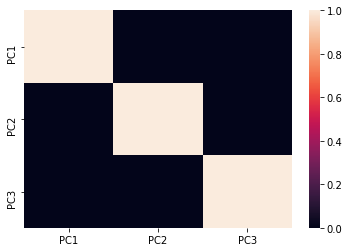

In [78]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


In [79]:
data_pca['sii'] = train.reset_index(drop=True)['sii'] 

In [80]:
data_pca

,PC1,PC2,PC3,sii
0,-4.225162,-0.286379,1.405689,2
1,-5.610891,0.782928,-0.168694,0
2,-0.347082,1.461870,0.422622,0
3,-0.560302,0.854772,-0.751841,1
4,2.787951,1.791490,-0.165303,1
...,...,...,...,...
2731,-2.809161,1.400066,0.530105,0
2732,-5.527277,-0.374716,-0.071885,1
2733,0.961672,2.556339,-1.439364,1
2734,2.831289,2.104090,2.241023,1


In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, cohen_kappa_score, make_scorer
from sklearn import tree
import matplotlib.pyplot as plt
import xgboost as xgb
import sys
import os

class eval():
    '''
    Use case:
    import eval

    e = eval.eval(train_df_processed, '../eval/test6.txt', 42)
    e.save()

    # result be saved to ../eval/test6.txt
    '''
    def __init__(self, df, path='../eval/test', seed=42):
        self.seed = seed
        self.path = path

        try:
            os.makedirs(self.path)
        except FileExistsError:
            # directory already exists
            pass

        # Data ready, train test spliting
        self.X = df.drop(columns=['sii']).to_numpy()
        self.input_feature = df.drop(columns='sii').columns
        self.y = df['sii'].to_numpy()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=seed)

        # evaluation metrics
        def cv_kappa(x, y):
            return cohen_kappa_score(x, y, weights='quadratic')

        self.scoring = {
            'acc': 'accuracy',
            'f1_weighted': 'f1_weighted',
            'f1_macro': 'f1_macro',
            'prec_weighted': 'precision_weighted',
            'prec_macro': 'precision_macro',
            'reca_weighted': 'recall_weighted',
            'reca_macro': 'recall_macro',
            'kappa': make_scorer(cv_kappa),
        }
        
        # self.cv_kappa = make_scorer(cv_kappa)

    def save(self):
        target_names = ['None', 'Mild', 'Moderate', 'Severe']

        # sklearn decision tree
        out = 'Decision tree\n'
        clf1 = DecisionTreeClassifier(random_state=self.seed)
        clf1.fit(self.X_train, self.y_train)
        y_pred = clf1.predict(self.X_train)
        out += 'Training Quadratic Weighted Kappa: ' + str(cohen_kappa_score(self.y_train, y_pred, weights='quadratic')) + '\n'
        out += 'Training report:\n' + classification_report(self.y_train, y_pred, target_names=target_names) + '='*50 + '\n'

        y_pred = clf1.predict(self.X_test)
        out += 'Testing Quadratic Weighted Kappa: ' + str(cohen_kappa_score(self.y_test, y_pred, weights='quadratic')) + '\n'
        out += 'Testing report:\n' + classification_report(self.y_test, y_pred, target_names=target_names) + '='*50 + '\n'

        cv_ls = cross_validate(clf1, self.X, self.y, cv=10, scoring=self.scoring)
        # out += 'Cross_val_score on accuracy:\n' + str(cv_ls['test_acc']) + '\n Mean: ' + str(cv_ls['test_acc'].mean()) + '\n'
        # out += 'Cross_val_score on macro average F1:\n' + str(cv_ls['test_f1_macro']) + '\n Mean: ' + str(cv_ls['test_f1_macro'].mean()) + '\n'
        # out += 'Cross_val_score on weighted average F1:\n' + str(cv_ls['test_f1_weighted']) + '\n Mean: ' + str(cv_ls['test_f1_weighted'].mean()) + '\n'
        # out += 'Cross_val_score on macro averaged precision:\n' + str(cv_ls['test_prec_macro']) + '\n Mean: ' + str(cv_ls['test_prec_macro'].mean()) + '\n'
        # out += 'Cross_val_score on weighted averaged precision:\n' + str(cv_ls['test_prec_weighted']) + '\n Mean: ' + str(cv_ls['test_prec_weighted'].mean()) + '\n'
        # out += 'Cross_val_score on macro averaged recall:\n' + str(cv_ls['test_reca_macro']) + '\n Mean: ' + str(cv_ls['test_reca_macro'].mean()) + '\n'
        # out += 'Cross_val_score on weighted averaged recall:\n' + str(cv_ls['test_reca_weighted']) + '\n Mean: ' + str(cv_ls['test_reca_weighted'].mean()) + '\n'
        # out += 'Cross_val_score on Quadratic Weighted Kappa:\n' + str(cv_ls['test_kappa']) + '\n Mean: ' + str(cv_ls['test_kappa'].mean()) + '\n'

        out += 'Cross val mean report: \n'
        out += f"{'accuracy: ': >30}" + str(cv_ls['test_acc'].mean()) + '\n'
        out += f"{'macro average F1: ': >30}" + str(cv_ls['test_f1_macro'].mean()) + '\n'
        out += f"{'weighted average F1: ': >30}" + str(cv_ls['test_f1_weighted'].mean()) + '\n'
        out += f"{'macro averaged precision: ': >30}" + str(cv_ls['test_prec_macro'].mean()) + '\n'
        out += f"{'weighted averaged precision: ': >30}" + str(cv_ls['test_prec_weighted'].mean()) + '\n'
        out += f"{'macro averaged recall: ': >30}" + str(cv_ls['test_reca_macro'].mean()) + '\n'
        out += f"{'weighted averaged recall: ': >30}" + str(cv_ls['test_reca_weighted'].mean()) + '\n'
        out += f"{'Quadratic Weighted Kappa: ': >30}" + str(cv_ls['test_kappa'].mean()) + '\n'
        out += '='*50 + '\n' + '='*50 + '\n'

        # skleanr random forest
        out += 'Random forest\n'
        clf2 = RandomForestClassifier(random_state=self.seed)
        clf2.fit(self.X_train, self.y_train)
        y_pred = clf2.predict(self.X_train)
        out += 'Training Quadratic Weighted Kappa: ' + str(cohen_kappa_score(self.y_train, y_pred, weights='quadratic'))
        out += 'Training report:\n' + classification_report(self.y_train, y_pred, target_names=target_names) + '='*50 + '\n'

        y_pred = clf2.predict(self.X_test)
        out += 'Testing Quadratic Weighted Kappa: ' + str(cohen_kappa_score(self.y_test, y_pred, weights='quadratic')) + '\n'
        out += 'Testing report:\n' + classification_report(self.y_test, y_pred, target_names=target_names) + '='*50 + '\n'

        cv_ls = cross_validate(clf2, self.X, self.y, cv=10, scoring=self.scoring)
        out += 'Cross val mean report: \n'
        out += f"{'accuracy: ': >30}" + str(cv_ls['test_acc'].mean()) + '\n'
        out += f"{'macro average F1: ': >30}" + str(cv_ls['test_f1_macro'].mean()) + '\n'
        out += f"{'weighted average F1: ': >30}" + str(cv_ls['test_f1_weighted'].mean()) + '\n'
        out += f"{'macro averaged precision: ': >30}" + str(cv_ls['test_prec_macro'].mean()) + '\n'
        out += f"{'weighted averaged precision: ': >30}" + str(cv_ls['test_prec_weighted'].mean()) + '\n'
        out += f"{'macro averaged recall: ': >30}" + str(cv_ls['test_reca_macro'].mean()) + '\n'
        out += f"{'weighted averaged recall: ': >30}" + str(cv_ls['test_reca_weighted'].mean()) + '\n'
        out += f"{'Quadratic Weighted Kappa: ': >30}" + str(cv_ls['test_kappa'].mean()) + '\n'
        out += '='*50 + '\n' + '='*50 + '\n'

        # extreme gradient boost for random forest
        out += 'Extreme gradient boost for random forest\n'
        clf3 = xgb.XGBRFClassifier(random_state=42)
        clf3.fit(self.X_train, self.y_train)
        y_pred = clf3.predict(self.X_train)
        out += 'Training Quadratic Weighted Kappa: ' + str(cohen_kappa_score(self.y_train, y_pred, weights='quadratic')) + '\n'
        out += 'Training report:\n' + classification_report(self.y_train, y_pred, target_names=target_names) + '='*50 + '\n'

        y_pred = clf3.predict(self.X_test)
        out += 'Testing Quadratic Weighted Kappa: ' + str(cohen_kappa_score(self.y_test, y_pred, weights='quadratic')) + '\n'
        out += 'Testing report:\n' + classification_report(self.y_test, y_pred, target_names=target_names) + '='*50 + '\n'

        cv_ls = cross_validate(clf3, self.X, self.y, cv=10, scoring=self.scoring)        
        out += 'Cross val mean report: \n'
        out += f"{'accuracy: ': >30}" + str(cv_ls['test_acc'].mean()) + '\n'
        out += f"{'macro average F1: ': >30}" + str(cv_ls['test_f1_macro'].mean()) + '\n'
        out += f"{'weighted average F1: ': >30}" + str(cv_ls['test_f1_weighted'].mean()) + '\n'
        out += f"{'macro averaged precision: ': >30}" + str(cv_ls['test_prec_macro'].mean()) + '\n'
        out += f"{'weighted averaged precision: ': >30}" + str(cv_ls['test_prec_weighted'].mean()) + '\n'
        out += f"{'macro averaged recall: ': >30}" + str(cv_ls['test_reca_macro'].mean()) + '\n'
        out += f"{'weighted averaged recall: ': >30}" + str(cv_ls['test_reca_weighted'].mean()) + '\n'
        out += f"{'Quadratic Weighted Kappa: ': >30}" + str(cv_ls['test_kappa'].mean()) + '\n'
        out += '='*50 + '\n' + '='*50 + '\n'

        with open(self.path + '/evaluation_score.txt', 'w') as f:
            f.write(out)

        plt.figure(figsize=(30,12))
        tree.plot_tree(clf1, filled=True, rounded=True, max_depth=3, fontsize=10, feature_names=self.input_feature)
        plt.title("Decision tree trained on Feature")
        plt.savefig(self.path + '/DT.png')

        print('ended, result at: ', self.path)                                                      

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metr

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

ended, result at:  ./eval2/test_1.txt


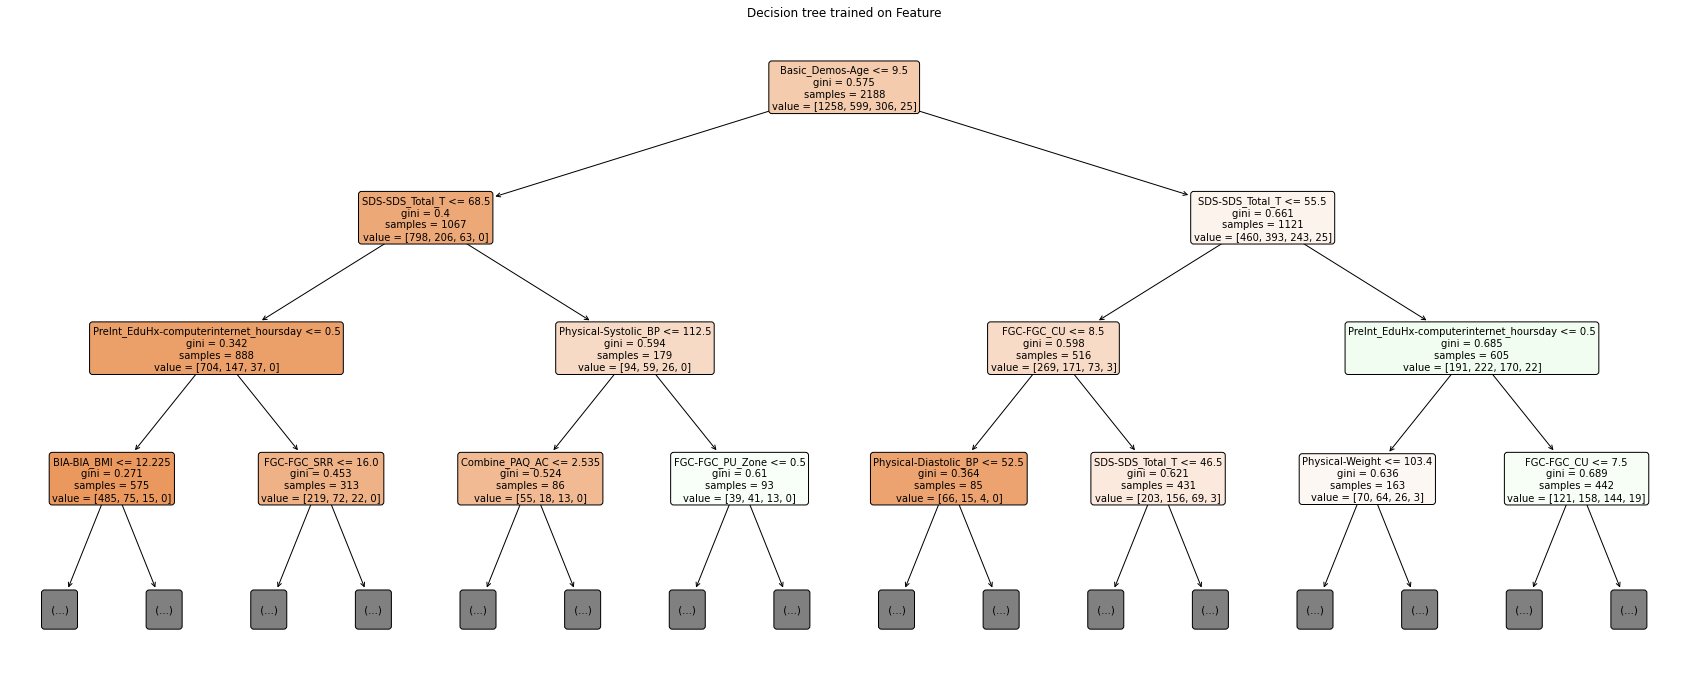

In [82]:
e = eval(train, './eval2/test_1.txt', 42)

e.save()


C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

ended, result at:  ./eval2/test_2.txt


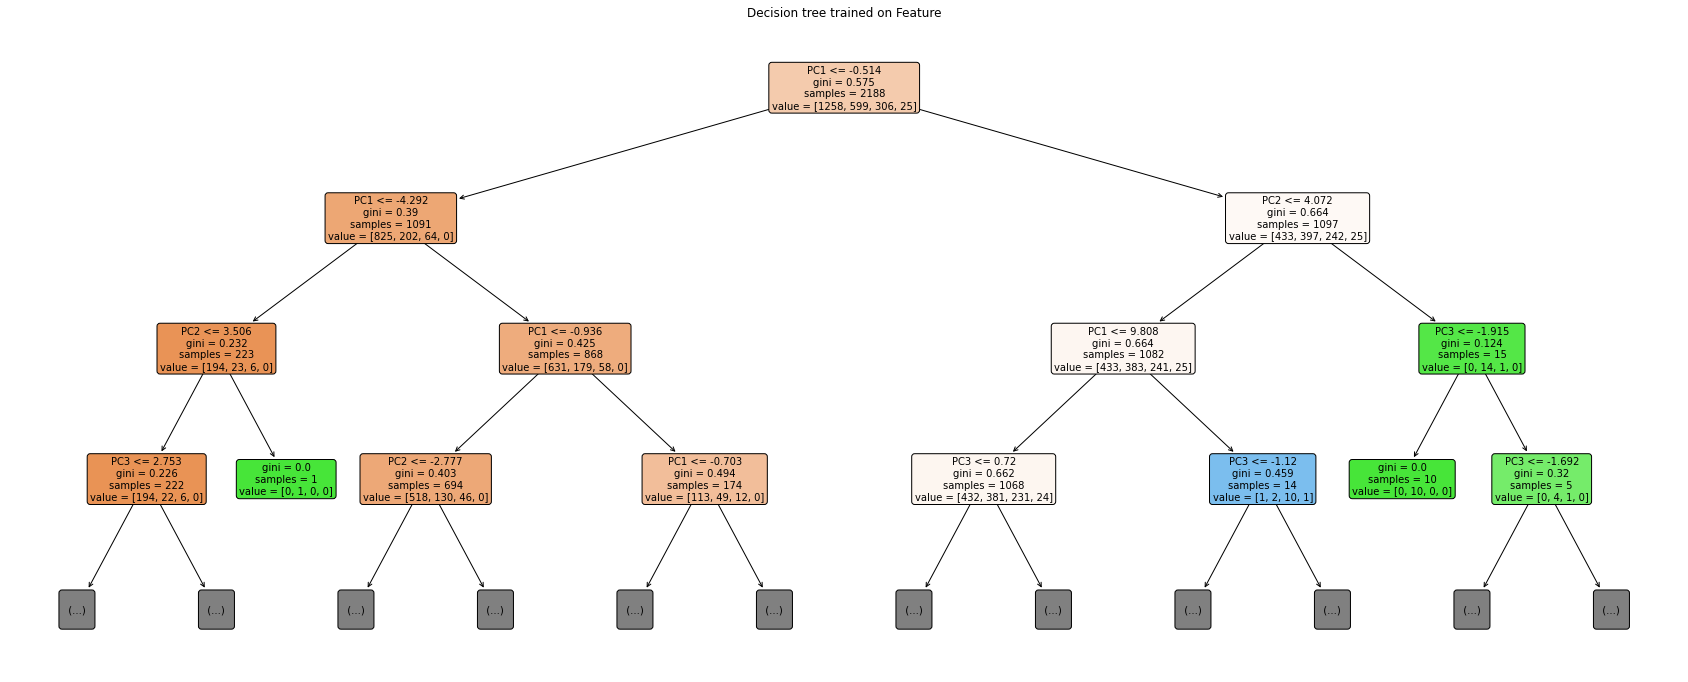

In [83]:
e = eval(data_pca, './eval2/test_2.txt', 42)

e.save()

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metr

ended, result at:  ./eval2/test_3.txt


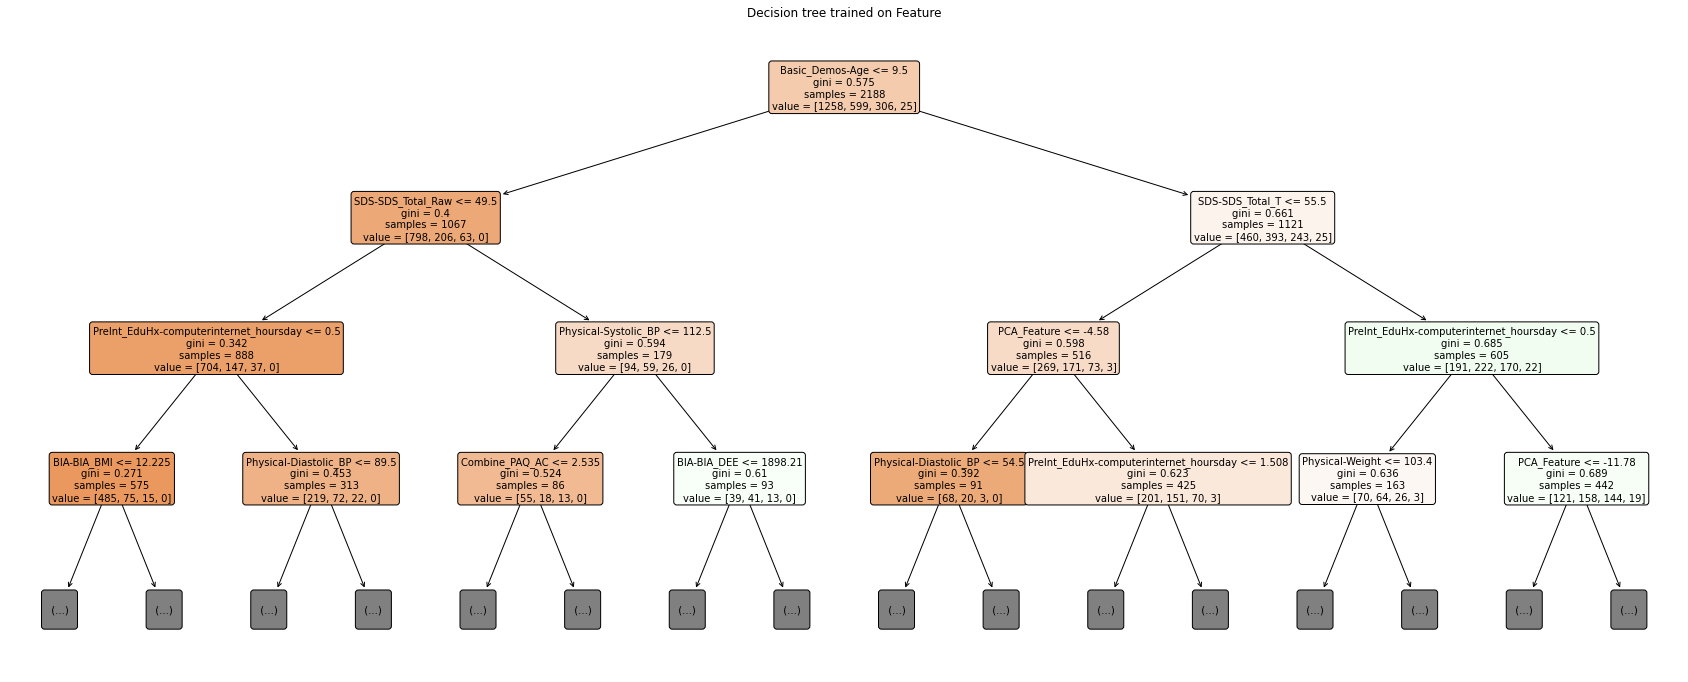

In [84]:
e = eval(combined_features, './eval2/test_3.txt', 42)

e.save()

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

ended, result at:  ./eval2/test_4.txt


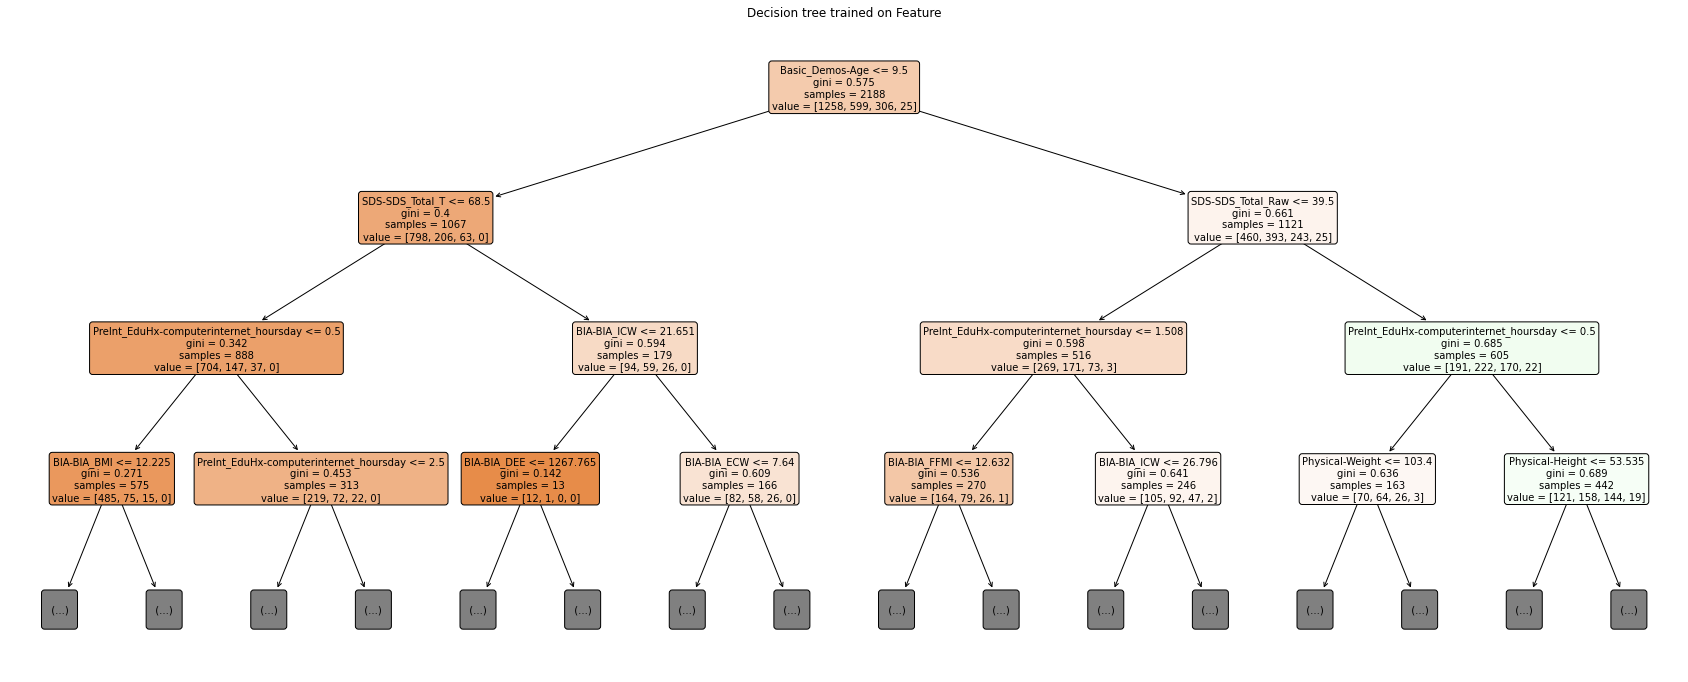

In [85]:
e = eval(Trial1, './eval2/test_4.txt', 42)

e.save()

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ended, result at:  ./eval2/test_5.txt


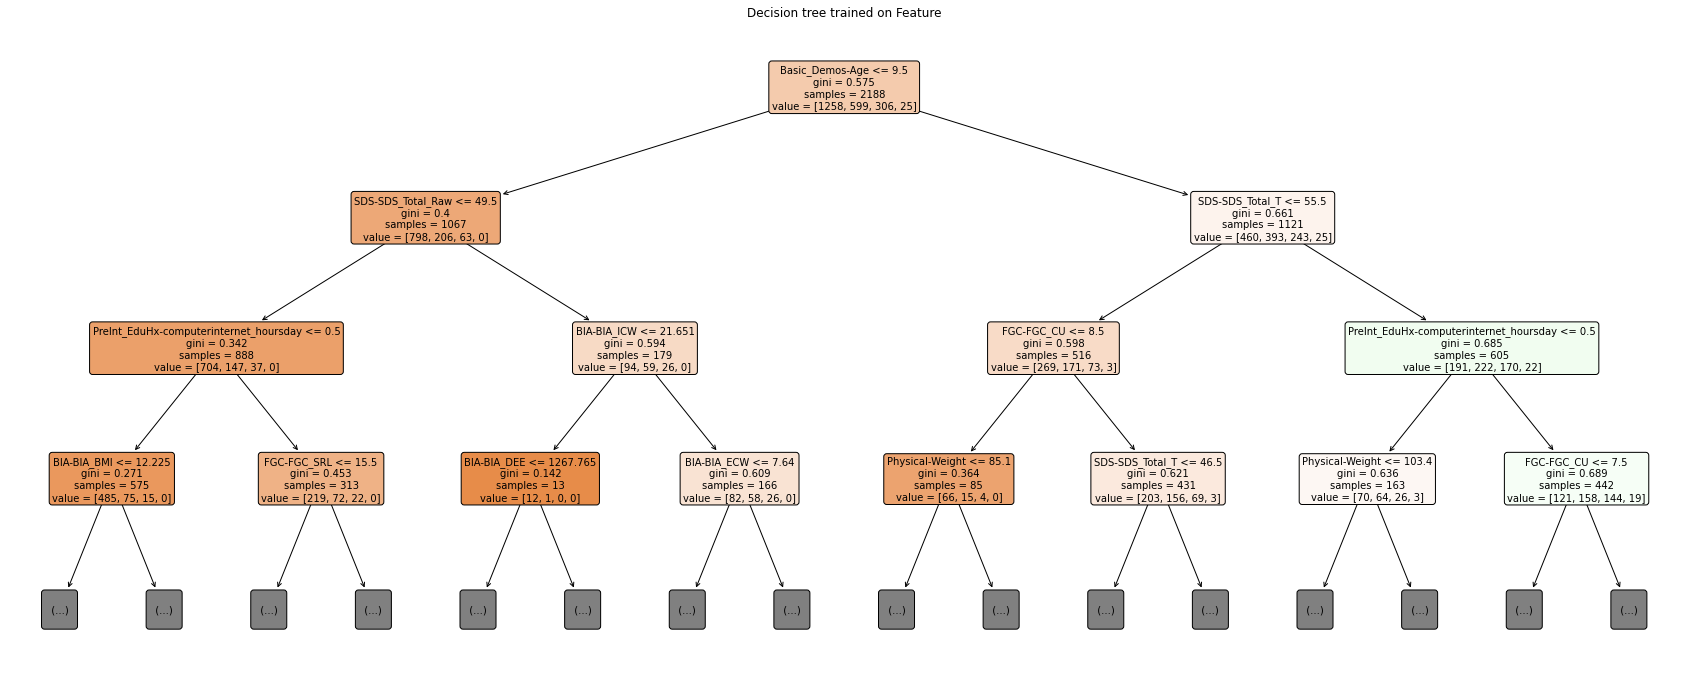

In [86]:
e = eval(Trial2, './eval2/test_5.txt', 42)

e.save()

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2121w\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ended, result at:  ./eval2/test_6.txt


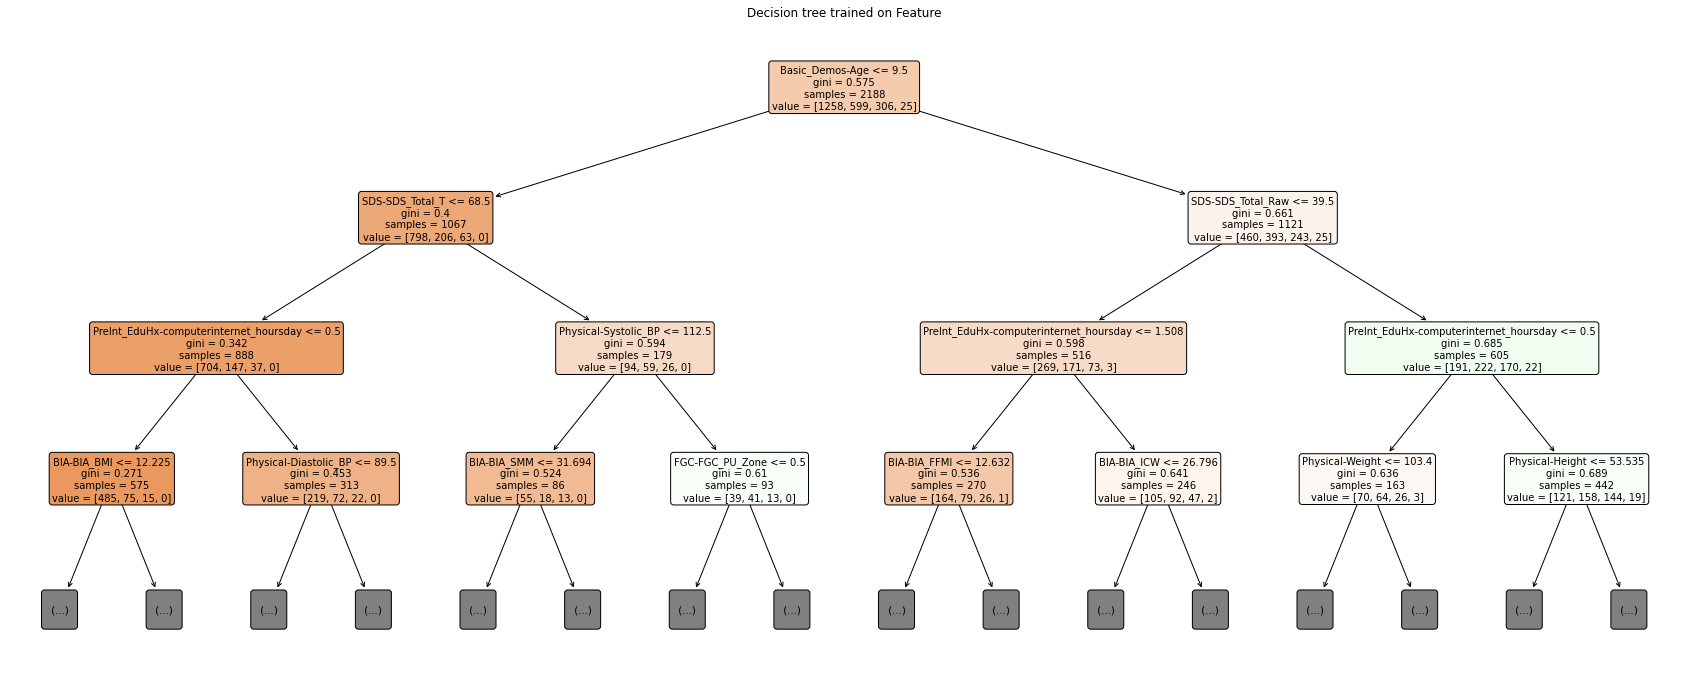

In [87]:
e = eval(Trial3, './eval2/test_6.txt', 42)

e.save()